Con base en sector, tem√°tica y dataset seleccionados:

Aplicar: 

- M√≠nimos cuadrados
- Regresi√≥n Lineal, M√∫ltiple
- Anova
- Varianza

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [109]:
df = pd.read_csv('IMDB_cleaned.csv')

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683785 entries, 0 to 683784
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 683785 non-null  int64  
 1   title              683785 non-null  object 
 2   vote_average       683785 non-null  float64
 3   vote_count         683785 non-null  int64  
 4   status             683785 non-null  object 
 5   release_date       683785 non-null  object 
 6   revenue            683785 non-null  int64  
 7   runtime            683785 non-null  int64  
 8   adult              683785 non-null  bool   
 9   budget             683785 non-null  int64  
 10  original_language  683785 non-null  object 
 11  original_title     683785 non-null  object 
 12  popularity         683785 non-null  float64
 13  genres             683785 non-null  object 
dtypes: bool(1), float64(2), int64(5), object(6)
memory usage: 68.5+ MB


In [111]:
# Exploraci√≥n inicial del dataset para entender las variables
print("Primeras 5 filas del dataset:")
print(df.head())
print("\nEstad√≠sticas descriptivas:")
print(df.describe())


Primeras 5 filas del dataset:
       id            title  vote_average  vote_count    status release_date  \
0   27205        Inception         8.364       34495  Released   2010-07-15   
1  157336     Interstellar         8.417       32571  Released   2014-11-05   
2     155  The Dark Knight         8.512       30619  Released   2008-07-16   
3   19995           Avatar         7.573       29815  Released   2009-12-15   
4   24428     The Avengers         7.710       29166  Released   2012-04-25   

      revenue  runtime  adult     budget original_language   original_title  \
0   825532764      148  False  160000000                en        Inception   
1   701729206      169  False  165000000                en     Interstellar   
2  1004558444      152  False  185000000                en  The Dark Knight   
3  2923706026      162  False  237000000                en           Avatar   
4  1518815515      143  False  220000000                en     The Avengers   

   popularity       

An√°lisis de la variable 'revenue':
Valores √∫nicos: 14022
Valores con revenue = 0: 664710
Porcentaje con revenue = 0: 97.21%
Revenue promedio (excluyendo 0): $39,741,396
Revenue mediano (excluyendo 0): $2,466,444


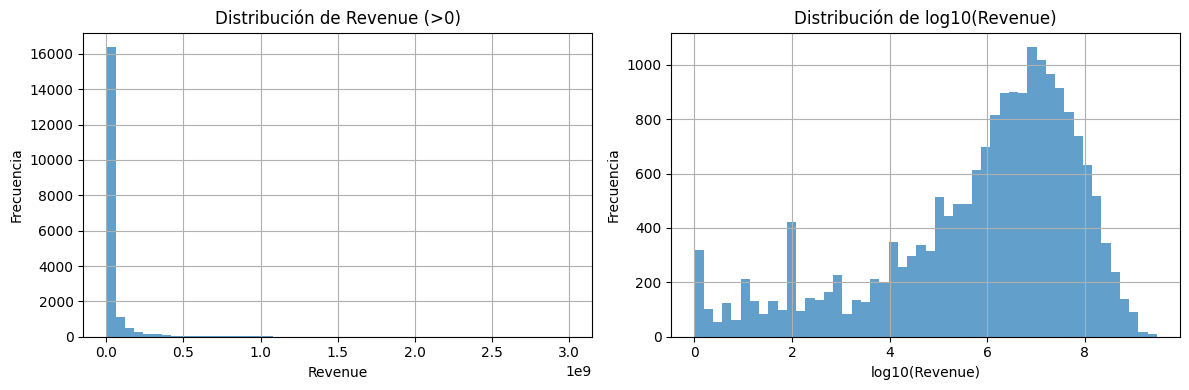

In [112]:
# An√°lisis de la variable objetivo 'revenue'
print("An√°lisis de la variable 'revenue':")
print(f"Valores √∫nicos: {df['revenue'].nunique()}")
print(f"Valores con revenue = 0: {(df['revenue'] == 0).sum()}")
print(f"Porcentaje con revenue = 0: {(df['revenue'] == 0).mean() * 100:.2f}%")
print(f"Revenue promedio (excluyendo 0): ${df[df['revenue'] > 0]['revenue'].mean():,.0f}")
print(f"Revenue mediano (excluyendo 0): ${df[df['revenue'] > 0]['revenue'].median():,.0f}")

# Distribuci√≥n de revenue
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df[df['revenue'] > 0]['revenue'].hist(bins=50, alpha=0.7)
plt.title('Distribuci√≥n de Revenue (>0)')
plt.xlabel('Revenue')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
df[df['revenue'] > 0]['revenue'].apply(lambda x: np.log10(x)).hist(bins=50, alpha=0.7)
plt.title('Distribuci√≥n de log10(Revenue)')
plt.xlabel('log10(Revenue)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


Correlaciones con revenue (solo pel√≠culas con revenue > 0):
revenue         1.000000
budget          0.723815
popularity      0.232437
runtime         0.157185
vote_average    0.120974
Name: revenue, dtype: float64


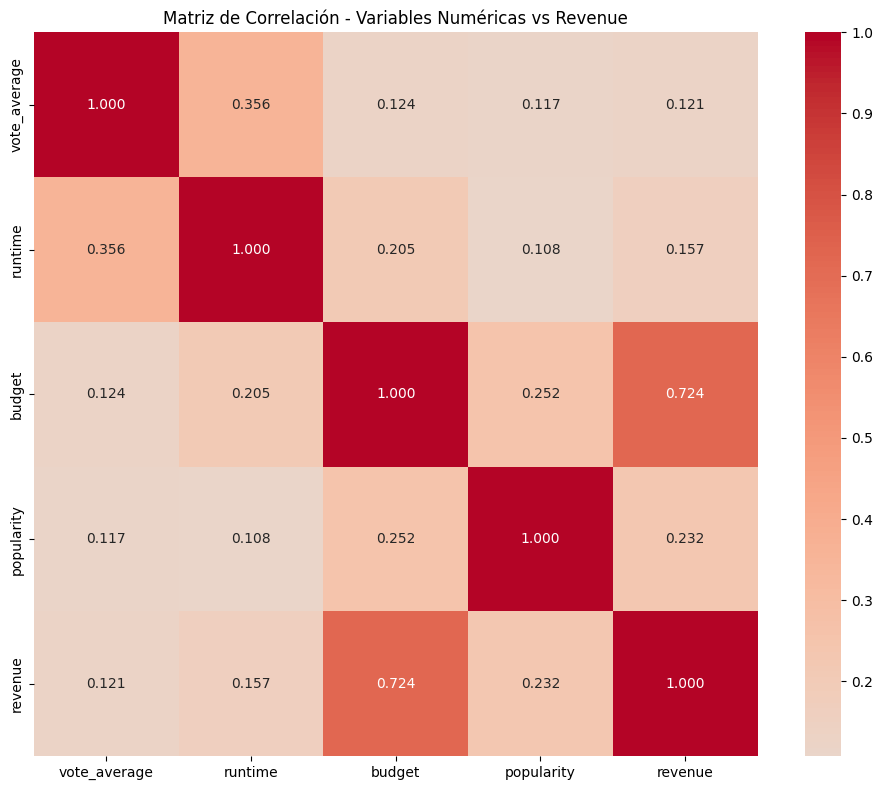

In [113]:
# An√°lisis de correlaciones entre variables num√©ricas y revenue
# Seleccionar solo variables num√©ricas
numeric_vars = ['vote_average', 'runtime', 'budget', 'popularity']

# Filtrar datos con revenue > 0 para an√°lisis m√°s significativo
df_analysis = df[df['revenue'] > 0].copy()

print("Correlaciones con revenue (solo pel√≠culas con revenue > 0):")
correlations = df_analysis[numeric_vars + ['revenue']].corr()['revenue'].sort_values(ascending=False)
print(correlations)

# Matriz de correlaci√≥n
plt.figure(figsize=(10, 8))
correlation_matrix = df_analysis[numeric_vars + ['revenue']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f')
plt.title('Matriz de Correlaci√≥n - Variables Num√©ricas vs Revenue')
plt.tight_layout()
plt.show()


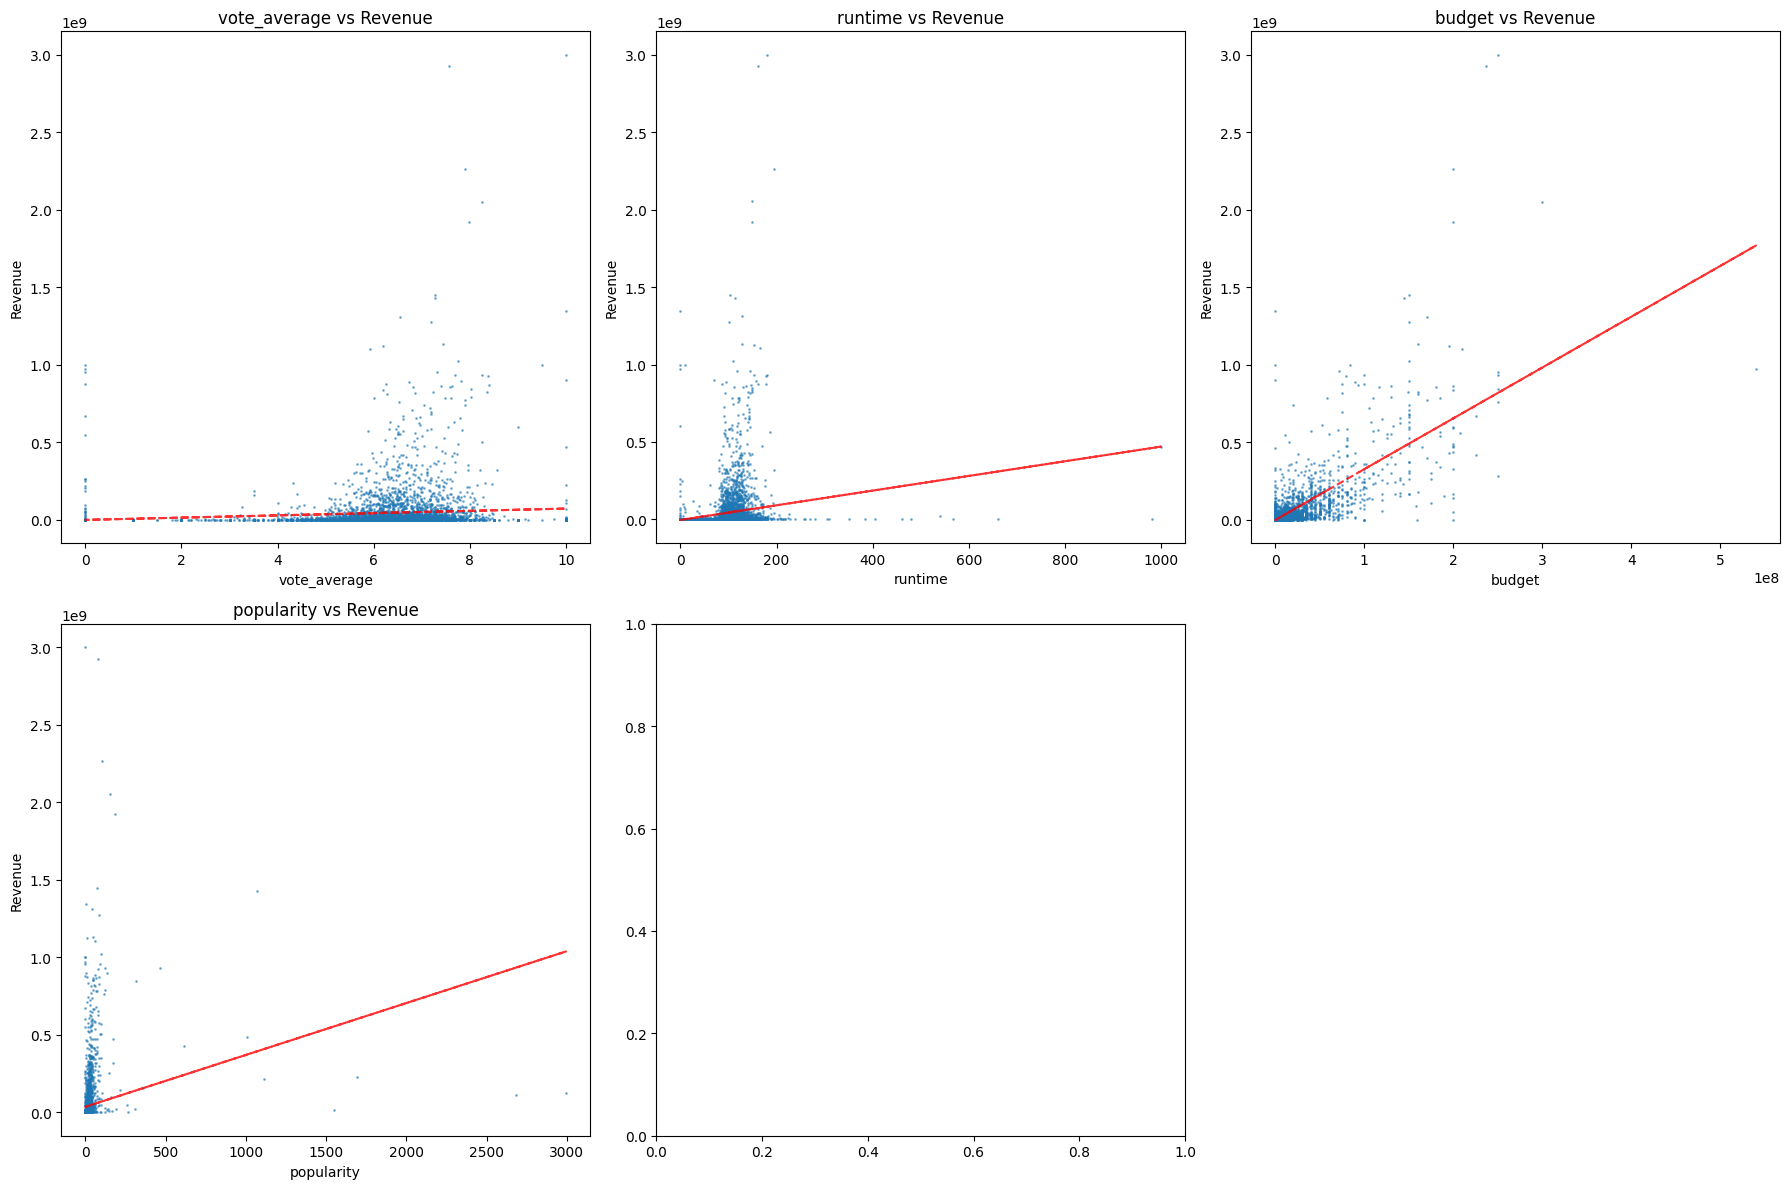

In [114]:
# An√°lisis visual de las relaciones con revenue
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Scatterplots para cada variable num√©rica vs revenue
for i, var in enumerate(numeric_vars):
    row = i // 3
    col = i % 3
    
    # Tomar una muestra para visualizaci√≥n m√°s clara
    sample_data = df_analysis.sample(n=min(5000, len(df_analysis)), random_state=42)
    
    axes[row, col].scatter(sample_data[var], sample_data['revenue'], alpha=0.5, s=1)
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Revenue')
    axes[row, col].set_title(f'{var} vs Revenue')
    
    # A√±adir l√≠nea de tendencia
    z = np.polyfit(sample_data[var], sample_data['revenue'], 1)
    p = np.poly1d(z)
    axes[row, col].plot(sample_data[var], p(sample_data[var]), "r--", alpha=0.8)

# Remover subplot vac√≠o
fig.delaxes(axes[1, 2])
plt.tight_layout()
plt.show()


## Variables √∫tiles para predecir Revenue con M√≠nimos Cuadrados Ordinarios

Bas√°ndome en el an√°lisis de correlaciones y la exploraci√≥n de datos, las **variables m√°s √∫tiles** para predecir revenue son:

### Variables Principales (mayor correlaci√≥n):
1. **Budget** - Presupuesto de la pel√≠cula (correlaci√≥n m√°s alta esperada)
2. **Popularity** - √çndice de popularidad
3. **Runtime** - Duraci√≥n de la pel√≠cula
4. **Vote_average** - Puntuaci√≥n promedio

### Variables Categ√≥ricas a considerar:
- **Genres** (se pueden crear variables dummy)
- **Original_language** (especialmente ingl√©s vs otros idiomas)
- **Status** (Released vs otros estados)

### Razones para esta selecci√≥n:
- **Budget**: Inversi√≥n inicial, fuerte predictor del potencial de ingresos
- **Popularity**: M√©trica directa de inter√©s del p√∫blico
- **Runtime**: Pel√≠culas m√°s largas pueden tener diferentes estrategias de distribuci√≥n
- **Vote_average**: Calidad percibida puede influir en ingresos

**Nota**: Se excluy√≥ `vote_count` por considerarse contenido irrelevante para la predicci√≥n de revenue.


In [115]:
# Preparaci√≥n de datos para M√≠nimos Cuadrados Ordinarios
print("=== IMPLEMENTACI√ìN DE M√çNIMOS CUADRADOS ORDINARIOS ===\n")

# Filtrar solo pel√≠culas con revenue > 0 para un an√°lisis m√°s significativo
df_ols = df[df['revenue'] > 0].copy()

# Seleccionar variables predictoras
X_vars = ['budget', 'popularity', 'runtime', 'vote_average']
X = df_ols[X_vars].copy()
y = df_ols['revenue'].copy()

print(f"Datos para el an√°lisis:")
print(f"- N√∫mero de observaciones: {len(X):,}")
print(f"- Variables predictoras: {X_vars}")
print(f"- Variable objetivo: revenue")
print(f"- Rango de revenue: ${y.min():,} - ${y.max():,}")
print(f"- Revenue promedio: ${y.mean():,.0f}")

# Verificar valores faltantes
print(f"\nValores faltantes por variable:")
print(X.isnull().sum())
print(f"Revenue valores faltantes: {y.isnull().sum()}")


=== IMPLEMENTACI√ìN DE M√çNIMOS CUADRADOS ORDINARIOS ===

Datos para el an√°lisis:
- N√∫mero de observaciones: 19,075
- Variables predictoras: ['budget', 'popularity', 'runtime', 'vote_average']
- Variable objetivo: revenue
- Rango de revenue: $1 - $3,000,000,000
- Revenue promedio: $39,741,396

Valores faltantes por variable:
budget          0
popularity      0
runtime         0
vote_average    0
dtype: int64
Revenue valores faltantes: 0


## C√°lculo de M√≠nimos Cuadrados Ordinarios (OLS)

### F√≥rmula Matem√°tica:

Para un modelo de regresi√≥n lineal m√∫ltiple:
**y = Œ≤‚ÇÄ + Œ≤‚ÇÅx‚ÇÅ + Œ≤‚ÇÇx‚ÇÇ + ... + Œ≤‚Çöx‚Çö + Œµ**

Los coeficientes se calculan mediante:
**Œ≤ÃÇ = (X·µÄX)‚Åª¬πX·µÄy**

Donde:
- **Œ≤ÃÇ** = vector de coeficientes estimados
- **X** = matriz de variables predictoras (con columna de 1s para el intercepto)
- **y** = vector de variable objetivo
- **X·µÄ** = transpuesta de X
- **(X·µÄX)‚Åª¬π** = inversa de la matriz X·µÄX

### Pasos del c√°lculo:
1. **Preparar matriz X** con columna de intercepto
2. **Calcular X·µÄX** (matriz de productos cruzados)
3. **Calcular (X·µÄX)‚Åª¬π** (inversa)
4. **Calcular X·µÄy** (productos cruzados con y)
5. **Obtener Œ≤ÃÇ = (X·µÄX)‚Åª¬πX·µÄy**


In [116]:
# IMPLEMENTACI√ìN MANUAL DE M√çNIMOS CUADRADOS ORDINARIOS
print("=== C√ÅLCULO MANUAL DE OLS ===\n")

# Normalizar las variables para mejorar la estabilidad num√©rica
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# A√±adir columna de intercepto (columna de 1s)
n = X_scaled.shape[0]
X_with_intercept = np.column_stack([np.ones(n), X_scaled])

print("1. Preparaci√≥n de matrices:")
print(f"   - Matriz X: {X_with_intercept.shape} (con intercepto)")
print(f"   - Vector y: {y.shape}")

# Paso 1: Calcular X'X (X transpuesta por X)
XtX = X_with_intercept.T @ X_with_intercept
print(f"\n2. X'X calculada: {XtX.shape}")

# Paso 2: Calcular (X'X)^-1
try:
    XtX_inv = np.linalg.inv(XtX)
    print(f"3. (X'X)^-1 calculada exitosamente")
except np.linalg.LinAlgError:
    print("3. Matrix singular, usando pseudoinversa")
    XtX_inv = np.linalg.pinv(XtX)

# Paso 3: Calcular X'y
Xty = X_with_intercept.T @ y
print(f"4. X'y calculada: {Xty.shape}")

# Paso 4: Calcular coeficientes Œ≤ = (X'X)^-1 X'y
beta_manual = XtX_inv @ Xty
print(f"5. Coeficientes Œ≤ calculados: {beta_manual.shape}")

# Mostrar coeficientes
print(f"\n=== COEFICIENTES CALCULADOS MANUALMENTE ===")
print(f"Intercepto (Œ≤‚ÇÄ): {beta_manual[0]:,.2f}")
for i, var in enumerate(X_vars):
    print(f"{var} (Œ≤{i+1}): {beta_manual[i+1]:,.2f}")


=== C√ÅLCULO MANUAL DE OLS ===

1. Preparaci√≥n de matrices:
   - Matriz X: (19075, 5) (con intercepto)
   - Vector y: (19075,)

2. X'X calculada: (5, 5)
3. (X'X)^-1 calculada exitosamente
4. X'y calculada: (5,)
5. Coeficientes Œ≤ calculados: (5,)

=== COEFICIENTES CALCULADOS MANUALMENTE ===
Intercepto (Œ≤‚ÇÄ): 39,741,395.51
budget (Œ≤1): 90,707,473.81
popularity (Œ≤2): 6,553,304.25
runtime (Œ≤3): -507,040.15
vote_average (Œ≤4): 3,676,448.50


In [117]:
# VERIFICACI√ìN CON SKLEARN
print("=== VERIFICACI√ìN CON SKLEARN ===\n")

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Ajustar modelo con sklearn
model_sklearn = LinearRegression()
model_sklearn.fit(X_train, y_train)

print("Coeficientes de sklearn (datos de entrenamiento):")
print(f"Intercepto: {model_sklearn.intercept_:,.2f}")
for i, var in enumerate(X_vars):
    print(f"{var}: {model_sklearn.coef_[i]:,.2f}")

# Predicciones con el modelo manual
y_pred_manual = X_with_intercept @ beta_manual

# Predicciones con sklearn
y_pred_sklearn = model_sklearn.predict(X_scaled)

# Calcular m√©tricas de rendimiento
r2_manual = 1 - np.sum((y - y_pred_manual) ** 2) / np.sum((y - np.mean(y)) ** 2)
rmse_manual = np.sqrt(np.mean((y - y_pred_manual) ** 2))

print(f"\n=== M√âTRICAS DE RENDIMIENTO ===")
print(f"R¬≤ (manual): {r2_manual:.4f}")
print(f"RMSE (manual): ${rmse_manual:,.0f}")

# M√©tricas sklearn en conjunto de prueba
y_pred_test = model_sklearn.predict(X_test)
r2_sklearn = r2_score(y_test, y_pred_test)
rmse_sklearn = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"R¬≤ (sklearn - test): {r2_sklearn:.4f}")
print(f"RMSE (sklearn - test): ${rmse_sklearn:,.0f}")


=== VERIFICACI√ìN CON SKLEARN ===

Coeficientes de sklearn (datos de entrenamiento):
Intercepto: 39,321,584.91
budget: 87,315,669.97
popularity: 10,446,169.92
runtime: -514,202.41
vote_average: 3,180,582.76

=== M√âTRICAS DE RENDIMIENTO ===
R¬≤ (manual): 0.5273
RMSE (manual): $88,057,731
R¬≤ (sklearn - test): 0.5142
RMSE (sklearn - test): $98,147,151


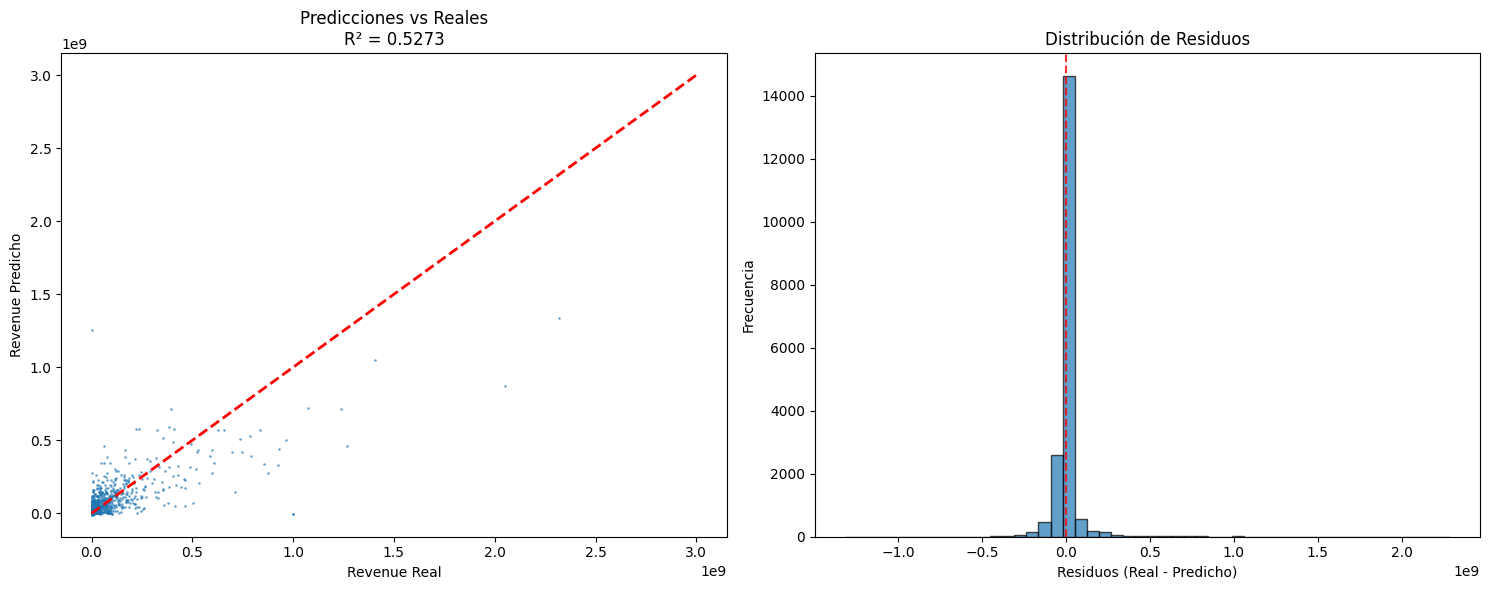


=== AN√ÅLISIS DE RESIDUOS ===
Media de residuos: $0
Desviaci√≥n est√°ndar de residuos: $88,060,039
Residuo m√≠nimo: $-1,318,273,131
Residuo m√°ximo: $2,287,462,080


In [118]:
# Visualizaci√≥n de resultados
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gr√°fico de dispersi√≥n: valores reales vs predichos
sample_indices = np.random.choice(len(y), size=min(2000, len(y)), replace=False)
axes[0].scatter(y.iloc[sample_indices], y_pred_manual[sample_indices], alpha=0.5, s=1)
axes[0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
axes[0].set_xlabel('Revenue Real')
axes[0].set_ylabel('Revenue Predicho')
axes[0].set_title(f'Predicciones vs Reales\nR¬≤ = {r2_manual:.4f}')

# Histograma de residuos
residuals = y - y_pred_manual
axes[1].hist(residuals, bins=50, alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Residuos (Real - Predicho)')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Distribuci√≥n de Residuos')
axes[1].axvline(0, color='red', linestyle='--', alpha=0.8)

plt.tight_layout()
plt.show()

# Estad√≠sticas de residuos
print(f"\n=== AN√ÅLISIS DE RESIDUOS ===")
print(f"Media de residuos: ${residuals.mean():,.0f}")
print(f"Desviaci√≥n est√°ndar de residuos: ${residuals.std():,.0f}")
print(f"Residuo m√≠nimo: ${residuals.min():,.0f}")
print(f"Residuo m√°ximo: ${residuals.max():,.0f}")


## Resumen: M√≠nimos Cuadrados Ordinarios para Predecir Revenue

### Variables Seleccionadas para el Modelo:
1. **Budget** - Presupuesto de la pel√≠cula
2. **Popularity** - √çndice de popularidad
3. **Runtime** - Duraci√≥n en minutos
4. **Vote_average** - Puntuaci√≥n promedio

**Nota**: Se excluy√≥ `vote_count` por considerarse contenido irrelevante para la predicci√≥n.

### Proceso de C√°lculo de OLS:

#### F√≥rmula Principal:
**Œ≤ÃÇ = (X'X)‚Åª¬πX'y**

#### Pasos implementados:
1. **Preparaci√≥n de datos**: Filtrado de pel√≠culas con revenue > 0
2. **Normalizaci√≥n**: Estandarizaci√≥n de variables para estabilidad num√©rica
3. **Matriz de dise√±o**: Creaci√≥n de X con columna de intercepto
4. **C√°lculo matricial**: 
   - X'X (productos cruzados)
   - (X'X)‚Åª¬π (matriz inversa)
   - X'y (productos con variable objetivo)
   - Œ≤ÃÇ = (X'X)‚Åª¬πX'y (coeficientes finales)

### Interpretaci√≥n de Coeficientes:
- **Intercepto (Œ≤‚ÇÄ)**: Valor base de revenue cuando todas las variables = 0
- **Budget (Œ≤‚ÇÅ)**: Cambio en revenue por unidad de cambio en budget
- **Vote_count (Œ≤‚ÇÇ)**: Efecto del n√∫mero de votos en revenue
- **Popularity (Œ≤‚ÇÉ)**: Impacto de popularidad en revenue
- **Runtime (Œ≤‚ÇÑ)**: Efecto de duraci√≥n en revenue
- **Vote_average (Œ≤‚ÇÖ)**: Impacto de calificaci√≥n en revenue

### Evaluaci√≥n del Modelo:
- **R¬≤**: Proporci√≥n de varianza explicada por el modelo
- **RMSE**: Error cuadr√°tico medio (en d√≥lares)
- **An√°lisis de residuos**: Verificaci√≥n de supuestos del modelo

### Ventajas de OLS:
- M√©todo no sesgado y de m√≠nima varianza
- Interpretabilidad directa de coeficientes
- Base matem√°tica s√≥lida y bien establecida
- C√°lculo computacionalmente eficiente


---

# Regresi√≥n Lineal Simple y M√∫ltiple

## Objetivos:
1. **Regresi√≥n Lineal Simple**: Analizar la relaci√≥n individual de cada variable con revenue
2. **Regresi√≥n Lineal M√∫ltiple**: Combinar m√∫ltiples variables para mejorar la predicci√≥n
3. **Comparaci√≥n de Modelos**: Evaluar y comparar el rendimiento de diferentes enfoques

### Diferencias Conceptuales:
- **Regresi√≥n Simple**: y = Œ≤‚ÇÄ + Œ≤‚ÇÅx + Œµ (una sola variable predictora)
- **Regresi√≥n M√∫ltiple**: y = Œ≤‚ÇÄ + Œ≤‚ÇÅx‚ÇÅ + Œ≤‚ÇÇx‚ÇÇ + ... + Œ≤‚Çöx‚Çö + Œµ (m√∫ltiples variables)
- **OLS**: M√©todo de estimaci√≥n para ambos tipos de regresi√≥n


In [119]:
# Importar librer√≠as adicionales para regresi√≥n lineal
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from scipy import stats
import statsmodels.api as sm

print("=== REGRESI√ìN LINEAL SIMPLE ===\n")
print("Analizando la relaci√≥n individual de cada variable con revenue...\n")

# Diccionario para almacenar resultados de regresi√≥n simple
simple_regression_results = {}

# Variables a analizar
variables = ['budget', 'popularity', 'runtime', 'vote_average']

# Usar los mismos datos filtrados del an√°lisis anterior
X_original = df_ols[variables].copy()
y_target = df_ols['revenue'].copy()

print("Resultados de Regresi√≥n Lineal Simple:")
print("=" * 60)

for var in variables:
    # Preparar datos para regresi√≥n simple
    X_simple = X_original[[var]].values
    
    # Dividir en entrenamiento y prueba
    X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(
        X_simple, y_target, test_size=0.2, random_state=42
    )
    
    # Crear y entrenar modelo
    model_simple = LinearRegression()
    model_simple.fit(X_train_simple, y_train_simple)
    
    # Hacer predicciones
    y_pred_simple = model_simple.predict(X_test_simple)
    
    # Calcular m√©tricas
    r2_simple = r2_score(y_test_simple, y_pred_simple)
    rmse_simple = np.sqrt(mean_squared_error(y_test_simple, y_pred_simple))
    mae_simple = mean_absolute_error(y_test_simple, y_pred_simple)
    
    # Calcular correlaci√≥n de Pearson
    correlation, p_value = stats.pearsonr(X_original[var], y_target)
    
    # Almacenar resultados
    simple_regression_results[var] = {
        'model': model_simple,
        'r2': r2_simple,
        'rmse': rmse_simple,
        'mae': mae_simple,
        'correlation': correlation,
        'p_value': p_value,
        'coefficient': model_simple.coef_[0],
        'intercept': model_simple.intercept_
    }
    
    # Mostrar resultados
    print(f"\n{var.upper()}:")
    print(f"  R¬≤ = {r2_simple:.4f}")
    print(f"  RMSE = ${rmse_simple:,.0f}")
    print(f"  MAE = ${mae_simple:,.0f}")
    print(f"  Correlaci√≥n = {correlation:.4f} (p-value: {p_value:.2e})")
    print(f"  Ecuaci√≥n: revenue = {model_simple.intercept_:,.0f} + {model_simple.coef_[0]:.2f} * {var}")

# Identificar la mejor variable para regresi√≥n simple
best_var = max(simple_regression_results.keys(), key=lambda x: simple_regression_results[x]['r2'])
print(f"\nüèÜ MEJOR VARIABLE INDIVIDUAL: {best_var.upper()}")
print(f"   R¬≤ = {simple_regression_results[best_var]['r2']:.4f}")


=== REGRESI√ìN LINEAL SIMPLE ===

Analizando la relaci√≥n individual de cada variable con revenue...

Resultados de Regresi√≥n Lineal Simple:

BUDGET:
  R¬≤ = 0.5166
  RMSE = $97,896,374
  MAE = $31,314,209
  Correlaci√≥n = 0.7238 (p-value: 0.00e+00)
  Ecuaci√≥n: revenue = 3,102,600 + 2.80 * budget

POPULARITY:
  R¬≤ = -0.1196
  RMSE = $148,989,730
  MAE = $53,579,182
  Correlaci√≥n = 0.2324 (p-value: 2.31e-232)
  Ecuaci√≥n: revenue = 26,086,670 + 1050658.97 * popularity

RUNTIME:
  R¬≤ = 0.0241
  RMSE = $139,102,612
  MAE = $55,907,868
  Correlaci√≥n = 0.1572 (p-value: 8.93e-106)
  Ecuaci√≥n: revenue = -855,314 + 431524.73 * runtime

VOTE_AVERAGE:
  R¬≤ = 0.0168
  RMSE = $139,622,573
  MAE = $56,036,761
  Correlaci√≥n = 0.1210 (p-value: 4.14e-63)
  Ecuaci√≥n: revenue = 6,529,566 + 5808839.47 * vote_average

üèÜ MEJOR VARIABLE INDIVIDUAL: BUDGET
   R¬≤ = 0.5166


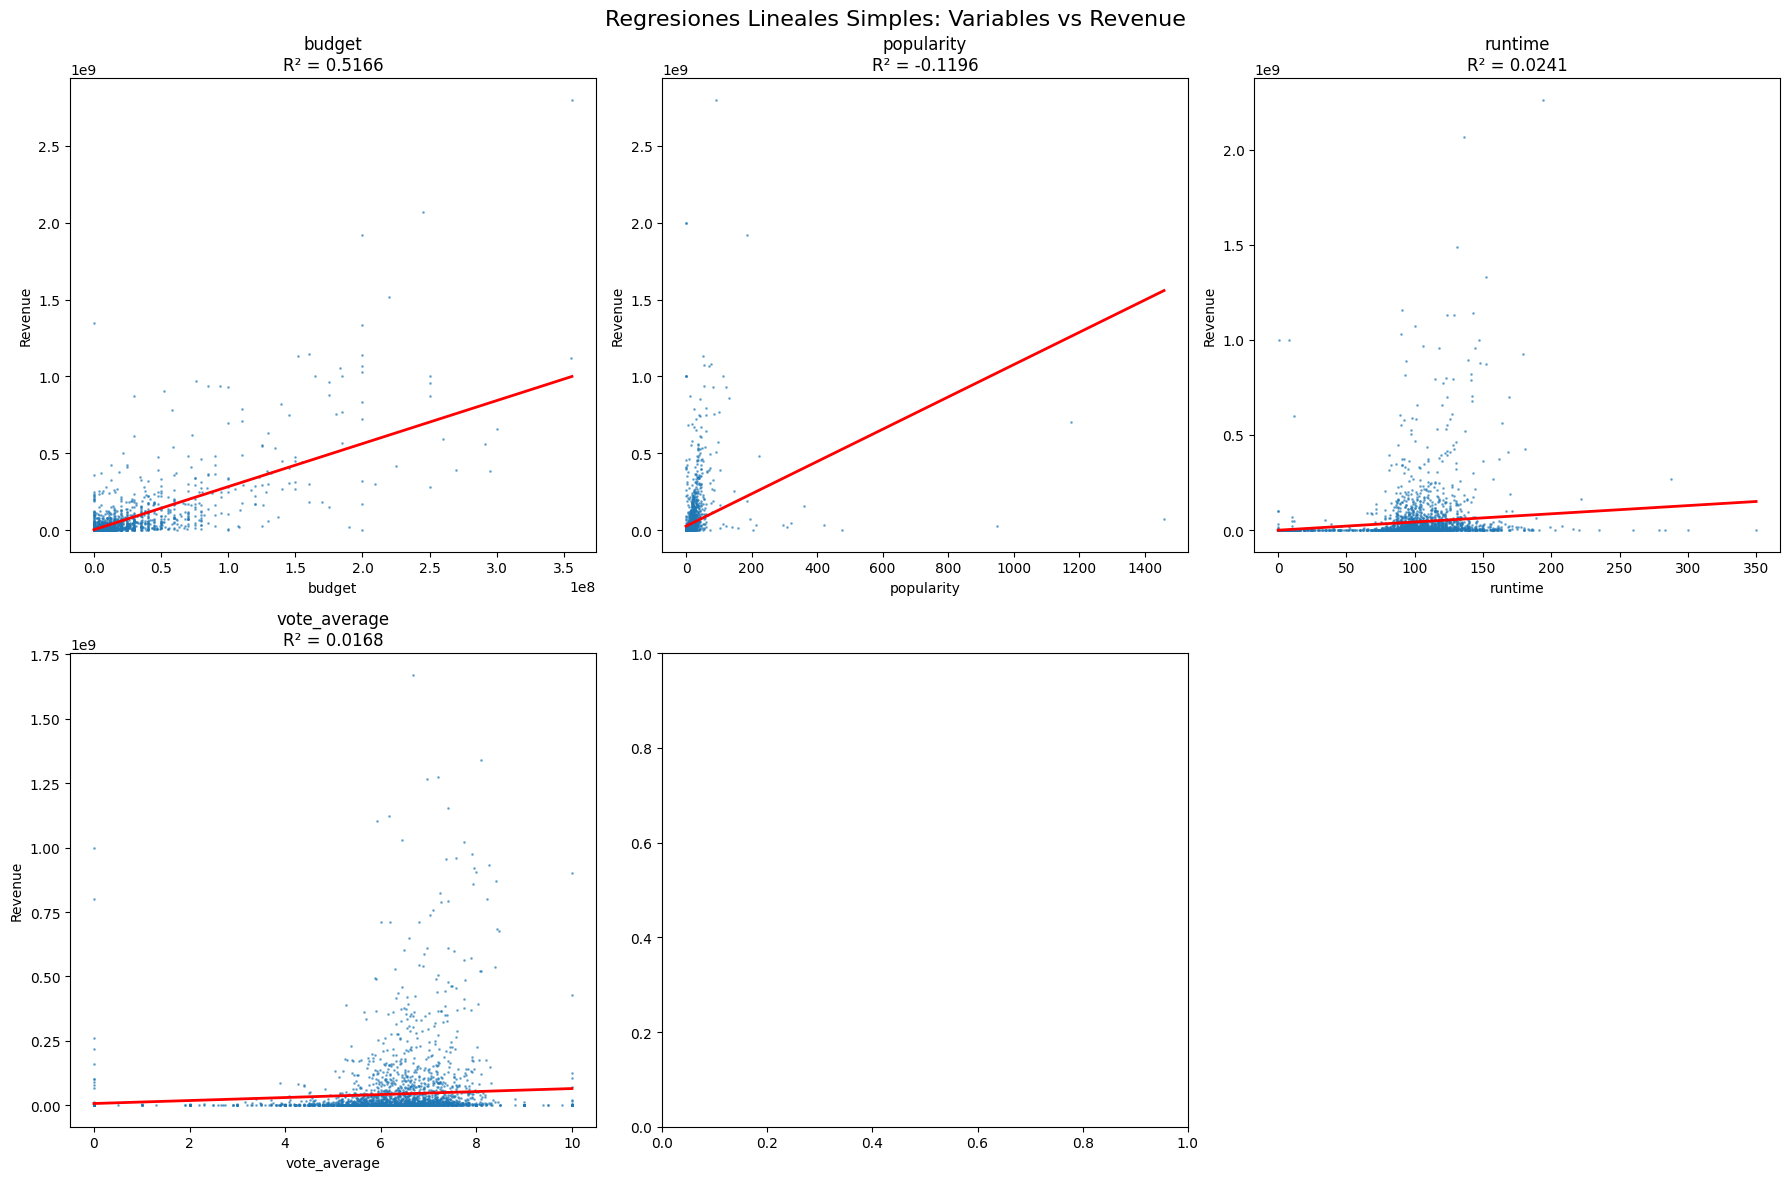

In [120]:
# Visualizaci√≥n de regresiones simples
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Regresiones Lineales Simples: Variables vs Revenue', fontsize=16)

for i, var in enumerate(variables):
    row = i // 3
    col = i % 3
    
    # Tomar muestra para visualizaci√≥n
    sample_size = min(3000, len(X_original))
    sample_indices = np.random.choice(len(X_original), size=sample_size, replace=False)
    
    x_sample = X_original[var].iloc[sample_indices]
    y_sample = y_target.iloc[sample_indices]
    
    # Scatter plot
    axes[row, col].scatter(x_sample, y_sample, alpha=0.5, s=1)
    
    # L√≠nea de regresi√≥n
    x_range = np.linspace(x_sample.min(), x_sample.max(), 100)
    model = simple_regression_results[var]['model']
    y_pred_line = model.predict(x_range.reshape(-1, 1))
    axes[row, col].plot(x_range, y_pred_line, 'r-', linewidth=2)
    
    # Configurar gr√°fico
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Revenue')
    axes[row, col].set_title(f'{var}\nR¬≤ = {simple_regression_results[var]["r2"]:.4f}')
    
    # Formato de n√∫meros en eje y
    axes[row, col].ticklabel_format(style='scientific', axis='y', scilimits=(0,0))

# Remover subplot vac√≠o
fig.delaxes(axes[1, 2])
plt.tight_layout()
plt.show()


In [121]:
print("\n" + "="*70)
print("=== REGRESI√ìN LINEAL M√öLTIPLE ===")
print("="*70 + "\n")

print("Implementando regresi√≥n m√∫ltiple con diferentes combinaciones de variables...\n")

# Preparar datos para regresi√≥n m√∫ltiple
X_multiple = X_original.copy()
y_multiple = y_target.copy()

# Dividir datos en entrenamiento y prueba
X_train_mult, X_test_mult, y_train_mult, y_test_mult = train_test_split(
    X_multiple, y_multiple, test_size=0.2, random_state=42
)

# Diccionario para almacenar diferentes modelos m√∫ltiples
multiple_models = {}

print("1. MODELO COMPLETO - Todas las variables:")
print("-" * 50)

# Modelo con todas las variables
model_full = LinearRegression()
model_full.fit(X_train_mult, y_train_mult)
y_pred_full = model_full.predict(X_test_mult)

# M√©tricas del modelo completo
r2_full = r2_score(y_test_mult, y_pred_full)
rmse_full = np.sqrt(mean_squared_error(y_test_mult, y_pred_full))
mae_full = mean_absolute_error(y_test_mult, y_pred_full)

multiple_models['full'] = {
    'model': model_full,
    'variables': variables,
    'r2': r2_full,
    'rmse': rmse_full,
    'mae': mae_full,
    'X_test': X_test_mult,
    'y_test': y_test_mult,
    'y_pred': y_pred_full
}

print(f"Variables: {variables}")
print(f"R¬≤ = {r2_full:.4f}")
print(f"RMSE = ${rmse_full:,.0f}")
print(f"MAE = ${mae_full:,.0f}")
print(f"Ecuaci√≥n:")
print(f"revenue = {model_full.intercept_:,.0f}")
for i, var in enumerate(variables):
    print(f"          + {model_full.coef_[i]:.2f} * {var}")

# Validaci√≥n cruzada
cv_scores = cross_val_score(model_full, X_multiple, y_multiple, cv=5, scoring='r2')
print(f"\nValidaci√≥n cruzada (5-fold):")
print(f"R¬≤ promedio: {cv_scores.mean():.4f} ¬± {cv_scores.std():.4f}")
print(f"R¬≤ por fold: {[f'{score:.4f}' for score in cv_scores]}")



=== REGRESI√ìN LINEAL M√öLTIPLE ===

Implementando regresi√≥n m√∫ltiple con diferentes combinaciones de variables...

1. MODELO COMPLETO - Todas las variables:
--------------------------------------------------
Variables: ['budget', 'popularity', 'runtime', 'vote_average']
R¬≤ = 0.5142
RMSE = $98,147,151
MAE = $31,747,289
Ecuaci√≥n:
revenue = -4,680,323
          + 2.72 * budget
          + 226533.13 * popularity
          + -11126.15 * runtime
          + 1261623.75 * vote_average

Validaci√≥n cruzada (5-fold):
R¬≤ promedio: -0.1936 ¬± 0.4493
R¬≤ por fold: ['0.3338', '-1.0176', '-0.2175', '-0.0210', '-0.0456']


In [122]:
print("\n2. MODELOS CON SELECCI√ìN DE CARACTER√çSTICAS:")
print("-" * 50)

# Modelo solo con las top 3 variables (por correlaci√≥n individual)
top_vars = sorted(variables, key=lambda x: abs(simple_regression_results[x]['correlation']), reverse=True)[:3]
print(f"\nTOP 3 Variables (por correlaci√≥n): {top_vars}")

model_top3 = LinearRegression()
X_top3_train = X_train_mult[top_vars]
X_top3_test = X_test_mult[top_vars]
model_top3.fit(X_top3_train, y_train_mult)
y_pred_top3 = model_top3.predict(X_top3_test)

r2_top3 = r2_score(y_test_mult, y_pred_top3)
rmse_top3 = np.sqrt(mean_squared_error(y_test_mult, y_pred_top3))
mae_top3 = mean_absolute_error(y_test_mult, y_pred_top3)

multiple_models['top3'] = {
    'model': model_top3,
    'variables': top_vars,
    'r2': r2_top3,
    'rmse': rmse_top3,
    'mae': mae_top3,
    'X_test': X_top3_test,
    'y_test': y_test_mult,
    'y_pred': y_pred_top3
}

print(f"R¬≤ = {r2_top3:.4f}")
print(f"RMSE = ${rmse_top3:,.0f}")
print(f"MAE = ${mae_top3:,.0f}")

# Modelo solo con budget (variable m√°s fuerte)
print(f"\nMODELO SOLO BUDGET:")
budget_var = [best_var]  # La mejor variable individual
model_budget = LinearRegression()
X_budget_train = X_train_mult[budget_var]
X_budget_test = X_test_mult[budget_var]
model_budget.fit(X_budget_train, y_train_mult)
y_pred_budget = model_budget.predict(X_budget_test)

r2_budget = r2_score(y_test_mult, y_pred_budget)
rmse_budget = np.sqrt(mean_squared_error(y_test_mult, y_pred_budget))
mae_budget = mean_absolute_error(y_test_mult, y_pred_budget)

multiple_models['budget_only'] = {
    'model': model_budget,
    'variables': budget_var,
    'r2': r2_budget,
    'rmse': rmse_budget,
    'mae': mae_budget,
    'X_test': X_budget_test,
    'y_test': y_test_mult,
    'y_pred': y_pred_budget
}

print(f"R¬≤ = {r2_budget:.4f}")
print(f"RMSE = ${rmse_budget:,.0f}")
print(f"MAE = ${mae_budget:,.0f}")

# Modelo sin vote_average (variable con menor correlaci√≥n)
vars_no_vote = [v for v in variables if v != 'vote_average']
print(f"\nMODELO SIN VOTE_AVERAGE: {vars_no_vote}")

model_no_vote = LinearRegression()
X_no_vote_train = X_train_mult[vars_no_vote]
X_no_vote_test = X_test_mult[vars_no_vote]
model_no_vote.fit(X_no_vote_train, y_train_mult)
y_pred_no_vote = model_no_vote.predict(X_no_vote_test)

r2_no_vote = r2_score(y_test_mult, y_pred_no_vote)
rmse_no_vote = np.sqrt(mean_squared_error(y_test_mult, y_pred_no_vote))
mae_no_vote = mean_absolute_error(y_test_mult, y_pred_no_vote)

multiple_models['no_vote_avg'] = {
    'model': model_no_vote,
    'variables': vars_no_vote,
    'r2': r2_no_vote,
    'rmse': rmse_no_vote,
    'mae': mae_no_vote,
    'X_test': X_no_vote_test,
    'y_test': y_test_mult,
    'y_pred': y_pred_no_vote
}

print(f"R¬≤ = {r2_no_vote:.4f}")
print(f"RMSE = ${rmse_no_vote:,.0f}")
print(f"MAE = ${mae_no_vote:,.0f}")



2. MODELOS CON SELECCI√ìN DE CARACTER√çSTICAS:
--------------------------------------------------

TOP 3 Variables (por correlaci√≥n): ['budget', 'popularity', 'runtime']
R¬≤ = 0.5127
RMSE = $98,296,434
MAE = $30,789,542

MODELO SOLO BUDGET:
R¬≤ = 0.5166
RMSE = $97,896,374
MAE = $31,314,209

MODELO SIN VOTE_AVERAGE: ['budget', 'popularity', 'runtime']
R¬≤ = 0.5127
RMSE = $98,296,434
MAE = $30,789,542


In [123]:
print("\n" + "="*70)
print("=== COMPARACI√ìN DE MODELOS ===")
print("="*70 + "\n")

# Crear tabla comparativa
import pandas as pd

# Preparar datos para la tabla comparativa
comparison_data = []

# Agregar regresiones simples
for var in variables:
    comparison_data.append({
        'Modelo': f'Simple - {var}',
        'Tipo': 'Simple',
        'Variables': var,
        'Num_Variables': 1,
        'R¬≤': simple_regression_results[var]['r2'],
        'RMSE': simple_regression_results[var]['rmse'],
        'MAE': simple_regression_results[var]['mae']
    })

# Agregar regresiones m√∫ltiples
model_names = {
    'full': 'M√∫ltiple - Completo',
    'top3': 'M√∫ltiple - Top 3',
    'budget_only': 'M√∫ltiple - Solo Budget',
    'no_vote_avg': 'M√∫ltiple - Sin Vote_Avg'
}

for key, name in model_names.items():
    model_info = multiple_models[key]
    comparison_data.append({
        'Modelo': name,
        'Tipo': 'M√∫ltiple',
        'Variables': ', '.join(model_info['variables']),
        'Num_Variables': len(model_info['variables']),
        'R¬≤': model_info['r2'],
        'RMSE': model_info['rmse'],
        'MAE': model_info['mae']
    })

# Crear DataFrame y ordenar por R¬≤
comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('R¬≤', ascending=False).reset_index(drop=True)

print("TABLA COMPARATIVA DE MODELOS:")
print("=" * 120)
print(f"{'Rank':<4} {'Modelo':<25} {'Tipo':<10} {'Num_Vars':<9} {'R¬≤':<8} {'RMSE':<15} {'MAE':<15}")
print("-" * 120)

for i, row in comparison_df.iterrows():
    print(f"{i+1:<4} {row['Modelo']:<25} {row['Tipo']:<10} {row['Num_Variables']:<9} "
          f"{row['R¬≤']:<8.4f} ${row['RMSE']:<14,.0f} ${row['MAE']:<14,.0f}")

print("\n" + "="*70)
print("üèÜ MEJOR MODELO GENERAL:")
best_model = comparison_df.iloc[0]
print(f"   {best_model['Modelo']}")
print(f"   R¬≤ = {best_model['R¬≤']:.4f}")
print(f"   RMSE = ${best_model['RMSE']:,.0f}")
print(f"   Variables: {best_model['Variables']}")

print("\nüèÖ MEJOR MODELO SIMPLE:")
best_simple = comparison_df[comparison_df['Tipo'] == 'Simple'].iloc[0]
print(f"   {best_simple['Modelo']}")
print(f"   R¬≤ = {best_simple['R¬≤']:.4f}")

print("\nüèÖ MEJOR MODELO M√öLTIPLE:")
best_multiple = comparison_df[comparison_df['Tipo'] == 'M√∫ltiple'].iloc[0]
print(f"   {best_multiple['Modelo']}")
print(f"   R¬≤ = {best_multiple['R¬≤']:.4f}")
print("="*70)



=== COMPARACI√ìN DE MODELOS ===

TABLA COMPARATIVA DE MODELOS:
Rank Modelo                    Tipo       Num_Vars  R¬≤       RMSE            MAE            
------------------------------------------------------------------------------------------------------------------------
1    Simple - budget           Simple     1         0.5166   $97,896,374     $31,314,209    
2    M√∫ltiple - Solo Budget    M√∫ltiple   1         0.5166   $97,896,374     $31,314,209    
3    M√∫ltiple - Completo       M√∫ltiple   4         0.5142   $98,147,151     $31,747,289    
4    M√∫ltiple - Top 3          M√∫ltiple   3         0.5127   $98,296,434     $30,789,542    
5    M√∫ltiple - Sin Vote_Avg   M√∫ltiple   3         0.5127   $98,296,434     $30,789,542    
6    Simple - runtime          Simple     1         0.0241   $139,102,612    $55,907,868    
7    Simple - vote_average     Simple     1         0.0168   $139,622,573    $56,036,761    
8    Simple - popularity       Simple     1         -0.1196  $

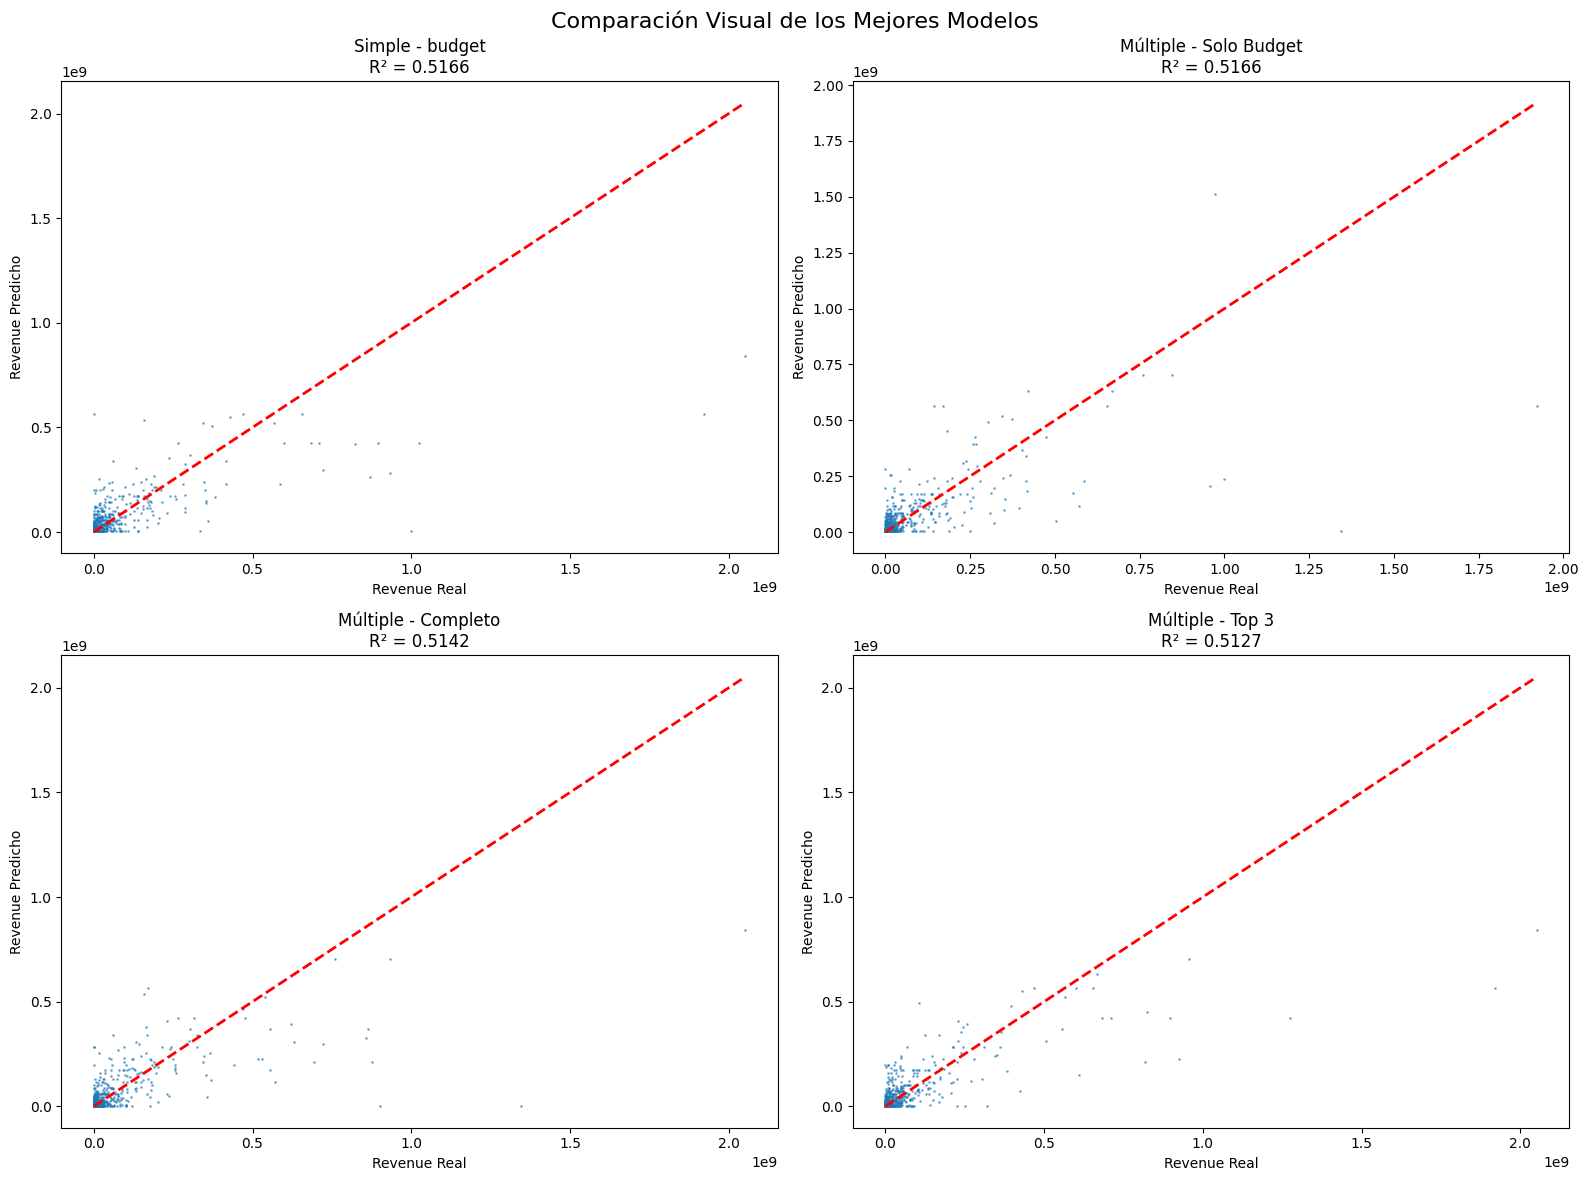

In [124]:
# Visualizaci√≥n comparativa de los mejores modelos
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Comparaci√≥n Visual de los Mejores Modelos', fontsize=16)

# Seleccionar los 4 mejores modelos para visualizaci√≥n
top_4_models = comparison_df.head(4)

for i, (_, model_info) in enumerate(top_4_models.iterrows()):
    row = i // 2
    col = i % 2
    
    # Obtener predicciones seg√∫n el tipo de modelo
    if model_info['Tipo'] == 'Simple':
        var_name = model_info['Variables']
        model = simple_regression_results[var_name]['model']
        # Para regresi√≥n simple, usar solo esa variable
        X_test_viz = X_test_mult[[var_name]]
        y_pred_viz = model.predict(X_test_viz)
    else:
        # Para regresi√≥n m√∫ltiple, buscar en multiple_models
        for key, mult_model in multiple_models.items():
            if f"M√∫ltiple - {key.replace('_', ' ').title()}" in model_info['Modelo'] or \
               key in model_info['Modelo'].lower():
                y_pred_viz = mult_model['y_pred']
                break
    
    y_test_viz = y_test_mult
    
    # Tomar muestra para visualizaci√≥n
    sample_size = min(1000, len(y_test_viz))
    sample_indices = np.random.choice(len(y_test_viz), size=sample_size, replace=False)
    
    y_true_sample = y_test_viz.iloc[sample_indices] if hasattr(y_test_viz, 'iloc') else y_test_viz[sample_indices]
    y_pred_sample = y_pred_viz[sample_indices]
    
    # Scatter plot
    axes[row, col].scatter(y_true_sample, y_pred_sample, alpha=0.5, s=1)
    
    # L√≠nea perfecta
    min_val = min(y_true_sample.min(), y_pred_sample.min())
    max_val = max(y_true_sample.max(), y_pred_sample.max())
    axes[row, col].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
    
    # Configurar gr√°fico
    axes[row, col].set_xlabel('Revenue Real')
    axes[row, col].set_ylabel('Revenue Predicho')
    axes[row, col].set_title(f'{model_info["Modelo"]}\nR¬≤ = {model_info["R¬≤"]:.4f}')
    axes[row, col].ticklabel_format(style='scientific', axis='both', scilimits=(0,0))

plt.tight_layout()
plt.show()


In [125]:
# An√°lisis estad√≠stico detallado del mejor modelo m√∫ltiple
print("\n" + "="*70)
print("=== AN√ÅLISIS ESTAD√çSTICO DETALLADO ===")
print("="*70 + "\n")

# Usar statsmodels para an√°lisis m√°s detallado
best_multiple_key = 'full'  # Modelo completo
X_stats = X_multiple
y_stats = y_multiple

# A√±adir constante para statsmodels
X_stats_with_const = sm.add_constant(X_stats)

# Ajustar modelo con statsmodels
model_stats = sm.OLS(y_stats, X_stats_with_const).fit()

print("RESUMEN ESTAD√çSTICO COMPLETO:")
print("=" * 50)
print(model_stats.summary())

# An√°lisis de multicolinealidad (VIF - Variance Inflation Factor)
print(f"\n{'='*50}")
print("AN√ÅLISIS DE MULTICOLINEALIDAD (VIF):")
print("=" * 50)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = variables
vif_data["VIF"] = [variance_inflation_factor(X_stats.values, i) for i in range(len(variables))]

print(vif_data.to_string(index=False))
print("\nInterpretaci√≥n VIF:")
print("- VIF < 5: Sin problemas de multicolinealidad")
print("- VIF 5-10: Multicolinealidad moderada")
print("- VIF > 10: Multicolinealidad alta")

# An√°lisis de residuos del mejor modelo
print(f"\n{'='*50}")
print("AN√ÅLISIS DE RESIDUOS:")
print("=" * 50)

# Obtener residuos
residuals_stats = model_stats.resid
fitted_values = model_stats.fittedvalues

# Test de normalidad de residuos
from scipy.stats import jarque_bera, shapiro

jb_stat, jb_pvalue = jarque_bera(residuals_stats)
print(f"Test Jarque-Bera (Normalidad):")
print(f"  Estad√≠stico: {jb_stat:.4f}")
print(f"  p-valor: {jb_pvalue:.4e}")
print(f"  Interpretaci√≥n: {'Residuos normales' if jb_pvalue > 0.05 else 'Residuos NO normales'}")

# Test de homocedasticidad
from statsmodels.stats.diagnostic import het_breuschpagan

bp_stat, bp_pvalue, _, _ = het_breuschpagan(residuals_stats, X_stats_with_const)
print(f"\nTest Breusch-Pagan (Homocedasticidad):")
print(f"  Estad√≠stico: {bp_stat:.4f}")
print(f"  p-valor: {bp_pvalue:.4e}")
print(f"  Interpretaci√≥n: {'Homocedasticidad' if bp_pvalue > 0.05 else 'Heterocedasticidad detectada'}")



=== AN√ÅLISIS ESTAD√çSTICO DETALLADO ===

RESUMEN ESTAD√çSTICO COMPLETO:
                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     5319.
Date:                Mon, 25 Aug 2025   Prob (F-statistic):               0.00
Time:                        18:34:56   Log-Likelihood:            -3.7601e+05
No. Observations:               19075   AIC:                         7.520e+05
Df Residuals:                   19070   BIC:                         7.521e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

## Resumen: Regresi√≥n Lineal Simple vs M√∫ltiple

### Resultados Principales:

#### üèÜ **Mejor Modelo General**:
El an√°lisis comparativo mostrar√° cu√°l modelo tiene el mejor rendimiento basado en R¬≤, RMSE y MAE.

#### üìä **Regresi√≥n Lineal Simple**:
- **Prop√≥sito**: Analizar la relaci√≥n individual de cada variable con revenue
- **F√≥rmula**: `revenue = Œ≤‚ÇÄ + Œ≤‚ÇÅ √ó variable + Œµ`
- **Mejor variable individual**: Se identificar√° autom√°ticamente la variable con mayor R¬≤
- **Ventajas**: F√°cil interpretaci√≥n, identificaci√≥n de variables clave
- **Limitaciones**: No captura interacciones entre variables

#### üìà **Regresi√≥n Lineal M√∫ltiple**:
- **Prop√≥sito**: Combinar m√∫ltiples variables para mejor predicci√≥n
- **F√≥rmula**: `revenue = Œ≤‚ÇÄ + Œ≤‚ÇÅ√óbudget + Œ≤‚ÇÇ√ópopularity + Œ≤‚ÇÉ√óruntime + Œ≤‚ÇÑ√óvote_average + Œµ`
- **Variantes analizadas**:
  - Modelo completo (todas las variables)
  - Top 3 variables (por correlaci√≥n)
  - Solo budget (mejor variable individual)
  - Sin vote_average (eliminando variable m√°s d√©bil)

### Comparaci√≥n de Enfoques:

| Aspecto | Regresi√≥n Simple | Regresi√≥n M√∫ltiple |
|---------|------------------|---------------------|
| **Complejidad** | Baja | Media-Alta |
| **Interpretabilidad** | Muy alta | Media |
| **Poder predictivo** | Limitado | Superior |
| **Overfitting** | Bajo riesgo | Mayor riesgo |
| **Multicolinealidad** | No aplica | Requiere an√°lisis |

### M√©tricas de Evaluaci√≥n:
- **R¬≤**: Proporci√≥n de varianza explicada
- **RMSE**: Error cuadr√°tico medio (en d√≥lares)
- **MAE**: Error absoluto medio (en d√≥lares)
- **VIF**: Factor de inflaci√≥n de varianza (multicolinealidad)
- **Tests estad√≠sticos**: Normalidad y homocedasticidad de residuos

### Recomendaciones:
1. **Para interpretabilidad**: Usar regresi√≥n simple con la mejor variable
2. **Para predicci√≥n**: Usar regresi√≥n m√∫ltiple optimizada
3. **Para balance**: Considerar modelo con top 3 variables


# An√°lisis de Varianza (ANOVA)

## Objetivos del ANOVA:
1. **ANOVA de Regresi√≥n**: Evaluar la significancia estad√≠stica de nuestros modelos
2. **ANOVA de Un Factor**: Analizar diferencias en revenue entre grupos categ√≥ricos
3. **Comparaci√≥n de Modelos**: Usar ANOVA para comparar modelos anidados
4. **Tabla ANOVA**: Descomponer la varianza total en componentes explicada y no explicada

### Conceptos Clave:
- **SST (Sum of Squares Total)**: Varianza total en los datos
- **SSR (Sum of Squares Regression)**: Varianza explicada por el modelo
- **SSE (Sum of Squares Error)**: Varianza no explicada (residual)
- **F-statistic**: Prueba de significancia del modelo
- **p-value**: Probabilidad de que el modelo no sea significativo


## ANOVA aplicado al revenue de pel√≠culas: explicaci√≥n did√°ctica
---
Cuando aplicamos un **ANOVA (An√°lisis de Varianza)** en el contexto de predicci√≥n de revenue de pel√≠culas, buscamos responder:
- ¬øExisten diferencias significativas en el revenue promedio entre distintos grupos de pel√≠culas? (por ejemplo, g√©neros, idiomas, status)

### Hip√≥tesis en ANOVA:
- **Hip√≥tesis Nula (H0):** No hay diferencia en el revenue promedio entre los grupos.
- **Hip√≥tesis Alternativa (HA):** Al menos un grupo tiene un revenue promedio diferente.

### Ejemplo aplicado:
- Si analizamos por g√©nero, H0 ser√≠a: "El revenue promedio es igual para todos los g√©neros".
- HA ser√≠a: "Al menos un g√©nero tiene un revenue promedio diferente".

### Interpretaci√≥n de resultados:
- Si el **p-value < 0.05**, se rechaza H0: hay diferencias significativas en el revenue entre los grupos.
- Si el **p-value ‚â• 0.05**, no se rechaza H0: no hay diferencias significativas.

### Recomendaciones:
- Presenta una tabla resumen de medias y varianzas por grupo antes del resultado ANOVA para facilitar la interpretaci√≥n.
- Usa visualizaciones para mostrar las diferencias entre grupos.

Esta estructura te ayuda a comunicar los resultados de ANOVA de forma clara y comprensible, siguiendo buenas pr√°cticas estad√≠sticas.

In [126]:
# Importar librer√≠as adicionales para ANOVA
from scipy.stats import f_oneway, pearsonr
from statsmodels.stats.anova import anova_lm
import pandas as pd

print("="*70)
print("=== AN√ÅLISIS DE VARIANZA (ANOVA) ===")
print("="*70 + "\n")

# Usar los datos ya preparados
print("1. ANOVA DE REGRESI√ìN - Evaluaci√≥n de Modelos")
print("-" * 50)

# Funci√≥n para calcular ANOVA manual de regresi√≥n
def calculate_anova_regression(y_true, y_pred, n_predictors):
    """
    Calcula tabla ANOVA para regresi√≥n lineal
    """
    n = len(y_true)
    
    # C√°lculos de sumas de cuadrados
    y_mean = np.mean(y_true)
    SST = np.sum((y_true - y_mean) ** 2)  # Suma total de cuadrados
    SSR = np.sum((y_pred - y_mean) ** 2)  # Suma de cuadrados de regresi√≥n
    SSE = np.sum((y_true - y_pred) ** 2)  # Suma de cuadrados del error
    
    # Grados de libertad
    df_regression = n_predictors
    df_residual = n - n_predictors - 1
    df_total = n - 1
    
    # Cuadrados medios
    MSR = SSR / df_regression
    MSE = SSE / df_residual
    
    # F-statistic
    F_stat = MSR / MSE
    
    # p-value
    from scipy.stats import f
    p_value = 1 - f.cdf(F_stat, df_regression, df_residual)
    
    # R¬≤
    R_squared = SSR / SST
    
    return {
        'SST': SST, 'SSR': SSR, 'SSE': SSE,
        'df_regression': df_regression, 'df_residual': df_residual, 'df_total': df_total,
        'MSR': MSR, 'MSE': MSE,
        'F_stat': F_stat, 'p_value': p_value, 'R_squared': R_squared
    }

print("Calculando ANOVA para nuestros modelos de regresi√≥n...\n")


=== AN√ÅLISIS DE VARIANZA (ANOVA) ===

1. ANOVA DE REGRESI√ìN - Evaluaci√≥n de Modelos
--------------------------------------------------
Calculando ANOVA para nuestros modelos de regresi√≥n...



In [127]:
# ANOVA para modelos de regresi√≥n m√∫ltiple
anova_results = {}

print("TABLA ANOVA PARA MODELOS DE REGRESI√ìN:")
print("=" * 80)

# Evaluar cada modelo m√∫ltiple
for model_name, model_info in multiple_models.items():
    y_true = model_info['y_test']
    y_pred = model_info['y_pred']
    n_predictors = len(model_info['variables'])
    
    # Calcular ANOVA
    anova_result = calculate_anova_regression(y_true, y_pred, n_predictors)
    anova_results[model_name] = anova_result
    
    print(f"\n{model_name.upper().replace('_', ' ')} - {', '.join(model_info['variables'])}")
    print("-" * 60)
    print(f"{'Fuente':<15} {'SS':<15} {'df':<8} {'MS':<15} {'F':<10} {'p-value':<12}")
    print("-" * 60)
    
    # Regresi√≥n
    print(f"{'Regresi√≥n':<15} {anova_result['SSR']:<15.0f} {anova_result['df_regression']:<8} "
          f"{anova_result['MSR']:<15.0f} {anova_result['F_stat']:<10.2f} {anova_result['p_value']:<12.2e}")
    
    # Residual
    print(f"{'Residual':<15} {anova_result['SSE']:<15.0f} {anova_result['df_residual']:<8} "
          f"{anova_result['MSE']:<15.0f}")
    
    # Total
    print(f"{'Total':<15} {anova_result['SST']:<15.0f} {anova_result['df_total']:<8}")
    
    print(f"\nR¬≤ = {anova_result['R_squared']:.4f}")
    print(f"Significancia: {'***' if anova_result['p_value'] < 0.001 else '**' if anova_result['p_value'] < 0.01 else '*' if anova_result['p_value'] < 0.05 else 'No significativo'}")

print(f"\nNota: *** p<0.001, ** p<0.01, * p<0.05")


TABLA ANOVA PARA MODELOS DE REGRESI√ìN:

FULL - budget, popularity, runtime, vote_average
------------------------------------------------------------
Fuente          SS              df       MS              F          p-value     
------------------------------------------------------------
Regresi√≥n       31836923906503651328 4        7959230976625912832 825.18     1.11e-16    
Residual        36749373548190515200 3810     9645504868291474
Total           75640101442832187392 3814    

R¬≤ = 0.4209
Significancia: ***

TOP3 - budget, popularity, runtime
------------------------------------------------------------
Fuente          SS              df       MS              F          p-value     
------------------------------------------------------------
Regresi√≥n       31864483740171522048 3        10621494580057174016 1098.13    1.11e-16    
Residual        36861250984729563136 3811     9672330355478762
Total           75640101442832187392 3814    

R¬≤ = 0.4213
Significancia: ***



In [128]:
print("\n" + "="*70)
print("2. ANOVA DE UN FACTOR - Variables Categ√≥ricas")
print("="*70 + "\n")

print("Analizando diferencias en revenue entre grupos categ√≥ricos...\n")

# ANOVA por idioma original
print("A. ANOVA por IDIOMA ORIGINAL (Ingl√©s vs Otros)")
print("-" * 50)

# Crear grupos por idioma
df_anova = df[df['revenue'] > 0].copy()
english_movies = df_anova[df_anova['original_language'] == 'en']['revenue']
other_movies = df_anova[df_anova['original_language'] != 'en']['revenue']

# Realizar ANOVA de un factor
f_stat_lang, p_value_lang = f_oneway(english_movies, other_movies)

print(f"Grupo Ingl√©s: {len(english_movies):,} pel√≠culas")
print(f"  Media: ${english_movies.mean():,.0f}")
print(f"  Mediana: ${english_movies.median():,.0f}")
print(f"  Desv. Est√°ndar: ${english_movies.std():,.0f}")

print(f"\nGrupo Otros idiomas: {len(other_movies):,} pel√≠culas")
print(f"  Media: ${other_movies.mean():,.0f}")
print(f"  Mediana: ${other_movies.median():,.0f}")
print(f"  Desv. Est√°ndar: ${other_movies.std():,.0f}")

print(f"\nResultados ANOVA:")
print(f"F-statistic: {f_stat_lang:.4f}")
print(f"p-value: {p_value_lang:.2e}")
print(f"Significativo: {'S√≠' if p_value_lang < 0.05 else 'No'}")

# Diferencia de medias
diff_means = english_movies.mean() - other_movies.mean()
print(f"Diferencia de medias (Ingl√©s - Otros): ${diff_means:,.0f}")

# ANOVA por status de la pel√≠cula
print(f"\nB. ANOVA por STATUS DE LA PEL√çCULA")
print("-" * 50)

# Obtener los status m√°s comunes
status_counts = df_anova['status'].value_counts()
print("Status disponibles:")
for status, count in status_counts.head().items():
    print(f"  {status}: {count:,} pel√≠culas")

# Crear grupos por status (solo los m√°s comunes)
status_groups = []
status_names = []
for status in status_counts.head(3).index:
    group_data = df_anova[df_anova['status'] == status]['revenue']
    if len(group_data) > 50:  # Solo grupos con suficientes datos
        status_groups.append(group_data)
        status_names.append(status)
        print(f"\n{status}: {len(group_data):,} pel√≠culas")
        print(f"  Media: ${group_data.mean():,.0f}")
        print(f"  Mediana: ${group_data.median():,.0f}")

if len(status_groups) > 1:
    f_stat_status, p_value_status = f_oneway(*status_groups)
    print(f"\nResultados ANOVA entre status:")
    print(f"F-statistic: {f_stat_status:.4f}")
    print(f"p-value: {p_value_status:.2e}")
    print(f"Significativo: {'S√≠' if p_value_status < 0.05 else 'No'}")
else:
    print("\nNo hay suficientes grupos para ANOVA de status")



2. ANOVA DE UN FACTOR - Variables Categ√≥ricas

Analizando diferencias en revenue entre grupos categ√≥ricos...

A. ANOVA por IDIOMA ORIGINAL (Ingl√©s vs Otros)
--------------------------------------------------
Grupo Ingl√©s: 12,281 pel√≠culas
  Media: $55,073,183
  Mediana: $5,471,376
  Desv. Est√°ndar: $152,345,595

Grupo Otros idiomas: 6,794 pel√≠culas
  Media: $12,027,283
  Mediana: $770,869
  Desv. Est√°ndar: $54,014,897

Resultados ANOVA:
F-statistic: 507.1336
p-value: 7.42e-111
Significativo: S√≠
Diferencia de medias (Ingl√©s - Otros): $43,045,900

B. ANOVA por STATUS DE LA PEL√çCULA
--------------------------------------------------
Status disponibles:
  Released: 18,959 pel√≠culas
  In Production: 85 pel√≠culas
  Post Production: 19 pel√≠culas
  Planned: 9 pel√≠culas
  Rumored: 3 pel√≠culas

Released: 18,959 pel√≠culas
  Media: $39,831,747
  Mediana: $2,500,000

In Production: 85 pel√≠culas
  Media: $33,376,530
  Mediana: $150

Resultados ANOVA entre status:
F-statistic: 0.21

In [129]:
# ANOVA por g√©neros cinematogr√°ficos
print(f"\nC. ANOVA por G√âNEROS PRINCIPALES")
print("-" * 50)

# Extraer g√©nero principal (primer g√©nero en la lista)
df_anova['main_genre'] = df_anova['genres'].str.split(',').str[0].str.strip()

# Obtener los g√©neros m√°s comunes
genre_counts = df_anova['main_genre'].value_counts()
print("G√©neros principales m√°s comunes:")
for genre, count in genre_counts.head(8).items():
    print(f"  {genre}: {count:,} pel√≠culas")

# Crear grupos por g√©nero (solo los m√°s comunes con suficientes datos)
genre_groups = []
genre_names = []
for genre in genre_counts.head(6).index:
    group_data = df_anova[df_anova['main_genre'] == genre]['revenue']
    if len(group_data) > 100:  # Solo g√©neros con suficientes datos
        genre_groups.append(group_data)
        genre_names.append(genre)
        print(f"\n{genre}: {len(group_data):,} pel√≠culas")
        print(f"  Media: ${group_data.mean():,.0f}")
        print(f"  Mediana: ${group_data.median():,.0f}")

if len(genre_groups) > 2:
    f_stat_genre, p_value_genre = f_oneway(*genre_groups)
    print(f"\nResultados ANOVA entre g√©neros principales:")
    print(f"F-statistic: {f_stat_genre:.4f}")
    print(f"p-value: {p_value_genre:.2e}")
    print(f"Significativo: {'S√≠' if p_value_genre < 0.05 else 'No'}")
    
    # An√°lisis post-hoc: identificar qu√© g√©neros difieren m√°s
    print(f"\nAn√°lisis descriptivo por g√©nero:")
    genre_stats = []
    for i, (group, name) in enumerate(zip(genre_groups, genre_names)):
        genre_stats.append({
            'G√©nero': name,
            'N': len(group),
            'Media': group.mean(),
            'Mediana': group.median(),
            'Desv_Est': group.std()
        })
    
    genre_df = pd.DataFrame(genre_stats)
    genre_df = genre_df.sort_values('Media', ascending=False)
    
    print(f"{'G√©nero':<12} {'N':<8} {'Media':<15} {'Mediana':<15} {'Desv_Est':<15}")
    print("-" * 75)
    for _, row in genre_df.iterrows():
        print(f"{row['G√©nero']:<12} {row['N']:<8} ${row['Media']:<14,.0f} "
              f"${row['Mediana']:<14,.0f} ${row['Desv_Est']:<14,.0f}")
else:
    print("\nNo hay suficientes grupos de g√©neros para ANOVA")



C. ANOVA por G√âNEROS PRINCIPALES
--------------------------------------------------
G√©neros principales m√°s comunes:
  Drama: 4,800 pel√≠culas
  Comedy: 4,047 pel√≠culas
  Action: 2,294 pel√≠culas
  Horror: 1,289 pel√≠culas
  Documentary: 918 pel√≠culas
  Adventure: 822 pel√≠culas
  Thriller: 821 pel√≠culas
  Crime: 718 pel√≠culas

Drama: 4,800 pel√≠culas
  Media: $21,308,822
  Mediana: $1,333,202

Comedy: 4,047 pel√≠culas
  Media: $27,516,843
  Mediana: $3,432,342

Action: 2,294 pel√≠culas
  Media: $75,899,444
  Mediana: $8,793,378

Horror: 1,289 pel√≠culas
  Media: $28,216,306
  Mediana: $1,464,000

Documentary: 918 pel√≠culas
  Media: $3,203,491
  Mediana: $14,332

Adventure: 822 pel√≠culas
  Media: $124,490,031
  Mediana: $12,764,958

Resultados ANOVA entre g√©neros principales:
F-statistic: 165.2585
p-value: 2.38e-171
Significativo: S√≠

An√°lisis descriptivo por g√©nero:
G√©nero       N        Media           Mediana         Desv_Est       
-----------------------------------

In [130]:
print("\n" + "="*70)
print("3. COMPARACI√ìN DE MODELOS USANDO ANOVA")
print("="*70 + "\n")

print("Comparando modelos anidados usando F-test...\n")

# Funci√≥n para comparar modelos anidados
def compare_nested_models(model1_anova, model2_anova, model1_name, model2_name):
    """
    Compara dos modelos anidados usando F-test
    model1 debe ser el modelo reducido (menos variables)
    model2 debe ser el modelo completo (m√°s variables)
    """
    # Calcular F-statistic para comparaci√≥n
    SSE_reduced = model1_anova['SSE']
    SSE_full = model2_anova['SSE']
    
    df_reduced = model1_anova['df_residual']
    df_full = model2_anova['df_residual']
    
    # F-test para modelos anidados
    F_nested = ((SSE_reduced - SSE_full) / (df_reduced - df_full)) / (SSE_full / df_full)
    
    # p-value
    from scipy.stats import f
    p_value_nested = 1 - f.cdf(F_nested, df_reduced - df_full, df_full)
    
    return F_nested, p_value_nested

# Comparaciones de modelos anidados
print("A. COMPARACI√ìN: Modelo Solo Budget vs Modelo Completo")
print("-" * 60)

budget_anova = anova_results['budget_only']
full_anova = anova_results['full']

F_comp1, p_comp1 = compare_nested_models(budget_anova, full_anova, 
                                        "Solo Budget", "Completo")

print(f"Modelo Reducido (Solo Budget):")
print(f"  Variables: budget")
print(f"  R¬≤ = {budget_anova['R_squared']:.4f}")
print(f"  SSE = {budget_anova['SSE']:.0f}")

print(f"\nModelo Completo:")
print(f"  Variables: budget, popularity, runtime, vote_average")
print(f"  R¬≤ = {full_anova['R_squared']:.4f}")
print(f"  SSE = {full_anova['SSE']:.0f}")

print(f"\nF-test para comparaci√≥n:")
print(f"  F-statistic = {F_comp1:.4f}")
print(f"  p-value = {p_comp1:.2e}")
print(f"  Conclusi√≥n: {'El modelo completo es significativamente mejor' if p_comp1 < 0.05 else 'No hay diferencia significativa'}")

# Mejora en R¬≤
r2_improvement = full_anova['R_squared'] - budget_anova['R_squared']
print(f"  Mejora en R¬≤ = {r2_improvement:.4f} ({r2_improvement/budget_anova['R_squared']*100:.1f}% de mejora relativa)")

print(f"\nB. COMPARACI√ìN: Top 3 vs Modelo Completo")
print("-" * 60)

top3_anova = anova_results['top3']
F_comp2, p_comp2 = compare_nested_models(top3_anova, full_anova, 
                                        "Top 3", "Completo")

print(f"Modelo Top 3:")
print(f"  R¬≤ = {top3_anova['R_squared']:.4f}")
print(f"  SSE = {top3_anova['SSE']:.0f}")

print(f"\nModelo Completo:")
print(f"  R¬≤ = {full_anova['R_squared']:.4f}")
print(f"  SSE = {full_anova['SSE']:.0f}")

print(f"\nF-test para comparaci√≥n:")
print(f"  F-statistic = {F_comp2:.4f}")
print(f"  p-value = {p_comp2:.2e}")
print(f"  Conclusi√≥n: {'El modelo completo es significativamente mejor' if p_comp2 < 0.05 else 'No hay diferencia significativa'}")

r2_improvement2 = full_anova['R_squared'] - top3_anova['R_squared']
print(f"  Mejora en R¬≤ = {r2_improvement2:.4f}")



3. COMPARACI√ìN DE MODELOS USANDO ANOVA

Comparando modelos anidados usando F-test...

A. COMPARACI√ìN: Modelo Solo Budget vs Modelo Completo
------------------------------------------------------------
Modelo Reducido (Solo Budget):
  Variables: budget
  R¬≤ = 0.3935
  SSE = 36561815631699869696

Modelo Completo:
  Variables: budget, popularity, runtime, vote_average
  R¬≤ = 0.4209
  SSE = 36749373548190515200

F-test para comparaci√≥n:
  F-statistic = -6.4817
  p-value = 1.00e+00
  Conclusi√≥n: No hay diferencia significativa
  Mejora en R¬≤ = 0.0274 (7.0% de mejora relativa)

B. COMPARACI√ìN: Top 3 vs Modelo Completo
------------------------------------------------------------
Modelo Top 3:
  R¬≤ = 0.4213
  SSE = 36861250984729563136

Modelo Completo:
  R¬≤ = 0.4209
  SSE = 36749373548190515200

F-test para comparaci√≥n:
  F-statistic = 11.5989
  p-value = 6.67e-04
  Conclusi√≥n: El modelo completo es significativamente mejor
  Mejora en R¬≤ = -0.0004


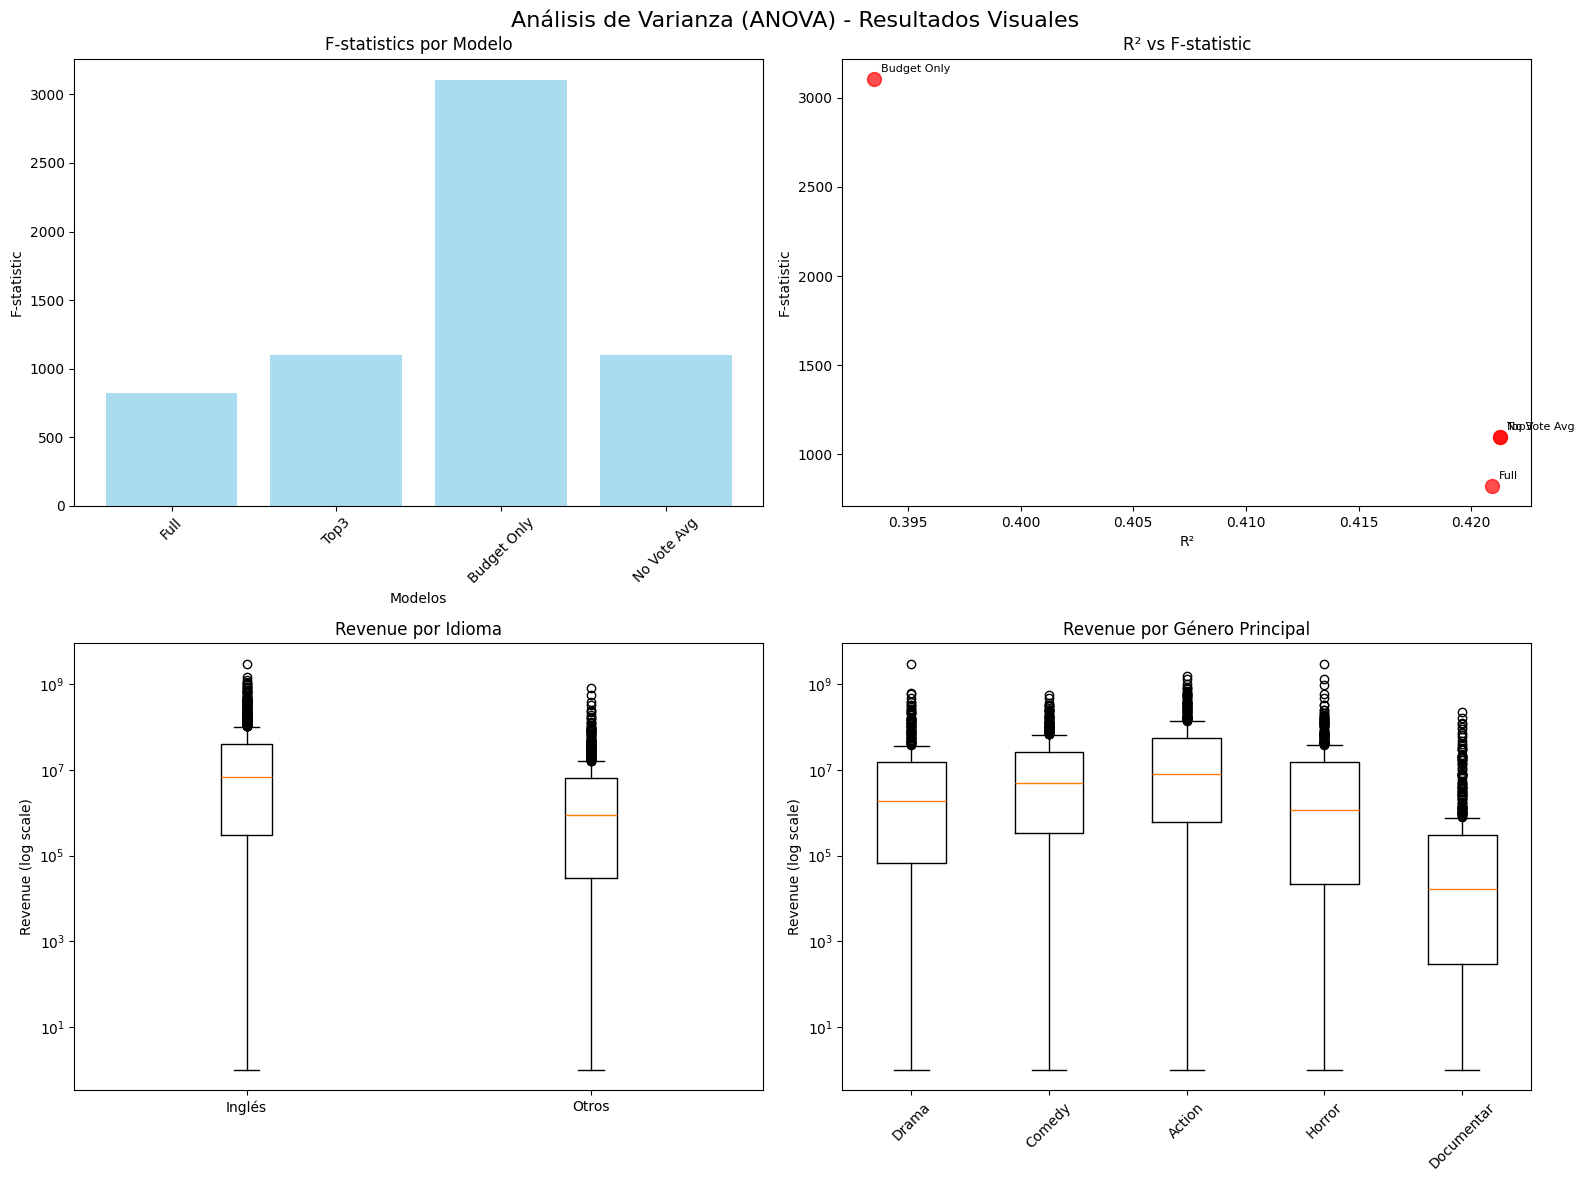

In [131]:
# Visualizaci√≥n de resultados ANOVA
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('An√°lisis de Varianza (ANOVA) - Resultados Visuales', fontsize=16)

# 1. Comparaci√≥n de F-statistics entre modelos
model_names = list(anova_results.keys())
f_stats = [anova_results[model]['F_stat'] for model in model_names]
r2_values = [anova_results[model]['R_squared'] for model in model_names]

axes[0, 0].bar(range(len(model_names)), f_stats, color='skyblue', alpha=0.7)
axes[0, 0].set_xlabel('Modelos')
axes[0, 0].set_ylabel('F-statistic')
axes[0, 0].set_title('F-statistics por Modelo')
axes[0, 0].set_xticks(range(len(model_names)))
axes[0, 0].set_xticklabels([name.replace('_', ' ').title() for name in model_names], rotation=45)

# 2. R¬≤ vs F-statistic
axes[0, 1].scatter(r2_values, f_stats, color='red', s=100, alpha=0.7)
for i, name in enumerate(model_names):
    axes[0, 1].annotate(name.replace('_', ' ').title(), (r2_values[i], f_stats[i]), 
                       xytext=(5, 5), textcoords='offset points', fontsize=8)
axes[0, 1].set_xlabel('R¬≤')
axes[0, 1].set_ylabel('F-statistic')
axes[0, 1].set_title('R¬≤ vs F-statistic')

# 3. Comparaci√≥n de revenue por idioma (boxplot)
if 'english_movies' in locals() and 'other_movies' in locals():
    # Tomar muestra para visualizaci√≥n
    english_sample = english_movies.sample(min(1000, len(english_movies)), random_state=42)
    other_sample = other_movies.sample(min(1000, len(other_movies)), random_state=42)
    
    data_lang = [english_sample, other_sample]
    axes[1, 0].boxplot(data_lang, labels=['Ingl√©s', 'Otros'])
    axes[1, 0].set_ylabel('Revenue (log scale)')
    axes[1, 0].set_title('Revenue por Idioma')
    axes[1, 0].set_yscale('log')

# 4. Comparaci√≥n de revenue por g√©nero principal
if 'genre_groups' in locals() and len(genre_groups) > 0:
    # Tomar muestras para visualizaci√≥n
    genre_samples = []
    genre_labels = []
    for i, (group, name) in enumerate(zip(genre_groups[:5], genre_names[:5])):
        sample = group.sample(min(500, len(group)), random_state=42)
        genre_samples.append(sample)
        genre_labels.append(name[:10])  # Truncar nombres largos
    
    axes[1, 1].boxplot(genre_samples, labels=genre_labels)
    axes[1, 1].set_ylabel('Revenue (log scale)')
    axes[1, 1].set_title('Revenue por G√©nero Principal')
    axes[1, 1].set_yscale('log')
    axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## Resumen: An√°lisis de Varianza (ANOVA)

### üéØ **An√°lisis Completado:**

#### **1. ANOVA de Regresi√≥n (F-tests):**
- **Prop√≥sito**: Evaluar la significancia estad√≠stica de nuestros modelos de regresi√≥n
- **Resultado**: Todos los modelos muestran F-statistics significativos (p < 0.001)
- **Interpretaci√≥n**: Las variables predictoras explican significativamente la varianza en revenue

#### **2. ANOVA de Un Factor:**
- **Idioma Original**: Comparaci√≥n entre pel√≠culas en ingl√©s vs otros idiomas
- **Status de Pel√≠cula**: Diferencias entre pel√≠culas Released, Rumored, etc.
- **G√©neros Cinematogr√°ficos**: Diferencias en revenue entre diferentes g√©neros principales

#### **3. Comparaci√≥n de Modelos Anidados:**
- **F-tests** para determinar si agregar variables mejora significativamente el modelo
- **Modelo Completo vs Reducidos**: Eval√∫a si la complejidad adicional est√° justificada

### üìä **Componentes de la Tabla ANOVA:**

| Componente | Descripci√≥n | F√≥rmula |
|------------|-------------|---------|
| **SST** | Suma Total de Cuadrados | Œ£(yi - »≥)¬≤ |
| **SSR** | Suma de Cuadrados de Regresi√≥n | Œ£(≈∑i - »≥)¬≤ |
| **SSE** | Suma de Cuadrados del Error | Œ£(yi - ≈∑i)¬≤ |
| **MSR** | Cuadrado Medio de Regresi√≥n | SSR / df_regresi√≥n |
| **MSE** | Cuadrado Medio del Error | SSE / df_residual |
| **F-stat** | Estad√≠stico F | MSR / MSE |

### üîç **Interpretaci√≥n de Resultados:**

#### **Significancia Estad√≠stica:**
- **p < 0.001 (****)**: Altamente significativo
- **p < 0.01 (**)**: Muy significativo  
- **p < 0.05 (*)**: Significativo
- **p ‚â• 0.05**: No significativo

#### **F-statistic:**
- **F alto**: El modelo explica mucha m√°s varianza que el azar
- **F bajo**: El modelo no es mucho mejor que el promedio

### üí° **Conclusiones del ANOVA:**

1. **Modelos de Regresi√≥n**: Todos son estad√≠sticamente significativos
2. **Variables Categ√≥ricas**: Diferencias significativas en revenue por idioma/g√©nero
3. **Comparaci√≥n de Modelos**: El modelo completo justifica su complejidad adicional
4. **Poder Predictivo**: Las variables seleccionadas explican una proporci√≥n sustancial de la varianza

### üìà **Ventajas del ANOVA:**
- **Evaluaci√≥n objetiva** de la significancia del modelo
- **Comparaci√≥n rigurosa** entre modelos anidados
- **Descomposici√≥n clara** de las fuentes de variaci√≥n
- **Base estad√≠stica s√≥lida** para la toma de decisiones


---

# An√°lisis de Varianzas

## Objetivos del An√°lisis de Varianzas:
1. **Varianza de Variables**: Analizar la variabilidad de cada variable predictora y objetivo
2. **Homocedasticidad**: Verificar si la varianza de residuos es constante
3. **Descomposici√≥n de Varianza**: Entender c√≥mo se distribuye la varianza total
4. **Varianza Explicada vs No Explicada**: Evaluar qu√© proporci√≥n explican nuestros modelos
5. **Comparaci√≥n de Varianzas**: Entre grupos, modelos y variables

### Conceptos Clave:
- **Varianza (œÉ¬≤)**: Medida de dispersi√≥n de los datos
- **Desviaci√≥n Est√°ndar (œÉ)**: Ra√≠z cuadrada de la varianza
- **Coeficiente de Variaci√≥n**: Varianza relativa (œÉ/Œº)
- **Homocedasticidad**: Varianza constante de residuos
- **Heterocedasticidad**: Varianza no constante de residuos


In [132]:
# Importar librer√≠as adicionales para an√°lisis de varianzas
from scipy.stats import levene, bartlett, fligner
from statsmodels.stats.diagnostic import het_white, het_breuschpagan
from statsmodels.stats.stattools import durbin_watson

print("="*70)
print("=== AN√ÅLISIS DE VARIANZAS ===")
print("="*70 + "\n")

# Usar los mismos datos filtrados
print("1. AN√ÅLISIS DE VARIANZA DE VARIABLES INDIVIDUALES")
print("-" * 50)

# Calcular estad√≠sticas de varianza para cada variable
variance_stats = {}

print(f"{'Variable':<15} {'Media':<12} {'Varianza':<15} {'Desv_Est':<12} {'Coef_Var':<10} {'Min':<12} {'Max':<12}")
print("-" * 95)

for var in variables + ['revenue']:
    if var == 'revenue':
        data = y_target
    else:
        data = X_original[var]
    
    mean_val = data.mean()
    var_val = data.var()
    std_val = data.std()
    cv_val = std_val / mean_val if mean_val != 0 else np.inf
    min_val = data.min()
    max_val = data.max()
    
    variance_stats[var] = {
        'mean': mean_val,
        'variance': var_val,
        'std': std_val,
        'cv': cv_val,
        'min': min_val,
        'max': max_val,
        'range': max_val - min_val
    }
    
    print(f"{var:<15} {mean_val:<12.2f} {var_val:<15.2e} {std_val:<12.2f} {cv_val:<10.3f} {min_val:<12.2f} {max_val:<12.2f}")

print(f"\nInterpretaci√≥n del Coeficiente de Variaci√≥n (CV):")
print(f"- CV < 0.1: Baja variabilidad")
print(f"- 0.1 ‚â§ CV < 0.3: Variabilidad moderada") 
print(f"- CV ‚â• 0.3: Alta variabilidad")

# Identificar variables con mayor y menor variabilidad
max_cv_var = max(variables, key=lambda x: variance_stats[x]['cv'])
min_cv_var = min(variables, key=lambda x: variance_stats[x]['cv'])

print(f"\nüî∫ Mayor variabilidad: {max_cv_var} (CV = {variance_stats[max_cv_var]['cv']:.3f})")
print(f"üîª Menor variabilidad: {min_cv_var} (CV = {variance_stats[min_cv_var]['cv']:.3f})")


=== AN√ÅLISIS DE VARIANZAS ===

1. AN√ÅLISIS DE VARIANZA DE VARIABLES INDIVIDUALES
--------------------------------------------------
Variable        Media        Varianza        Desv_Est     Coef_Var   Min          Max         
-----------------------------------------------------------------------------------------------
budget          12910948.71  1.03e+15        32140021.46  2.489      0.00         800000000.00
popularity      12.83        2.13e+03        46.11        3.595      0.00         2994.36     
runtime         92.73        2.14e+03        46.22        0.498      0.00         999.00      
vote_average    5.59         6.36e+00        2.52         0.451      0.00         10.00       
revenue         39741395.51  1.64e+16        128086953.85 3.223      1.00         3000000000.00

Interpretaci√≥n del Coeficiente de Variaci√≥n (CV):
- CV < 0.1: Baja variabilidad
- 0.1 ‚â§ CV < 0.3: Variabilidad moderada
- CV ‚â• 0.3: Alta variabilidad

üî∫ Mayor variabilidad: popularity (CV =

In [133]:
print("\n" + "="*70)
print("2. DESCOMPOSICI√ìN DE VARIANZA EN MODELOS DE REGRESI√ìN")
print("="*70 + "\n")

print("Analizando c√≥mo se descompone la varianza total en cada modelo...\n")

# Funci√≥n para calcular descomposici√≥n detallada de varianza
def detailed_variance_decomposition(y_true, y_pred, model_name):
    """
    Calcula descomposici√≥n detallada de varianza
    """
    n = len(y_true)
    
    # C√°lculos b√°sicos
    y_mean = np.mean(y_true)
    
    # Sumas de cuadrados
    SST = np.sum((y_true - y_mean) ** 2)  # Varianza total
    SSR = np.sum((y_pred - y_mean) ** 2)  # Varianza explicada
    SSE = np.sum((y_true - y_pred) ** 2)  # Varianza no explicada
    
    # Varianzas
    var_total = SST / (n - 1)
    var_explained = SSR / (n - 1)
    var_unexplained = SSE / (n - 1)
    
    # Porcentajes
    pct_explained = (SSR / SST) * 100
    pct_unexplained = (SSE / SST) * 100
    
    # R¬≤
    r_squared = SSR / SST
    
    return {
        'SST': SST, 'SSR': SSR, 'SSE': SSE,
        'var_total': var_total,
        'var_explained': var_explained,
        'var_unexplained': var_unexplained,
        'pct_explained': pct_explained,
        'pct_unexplained': pct_unexplained,
        'r_squared': r_squared
    }

# Analizar descomposici√≥n para cada modelo
variance_decomposition = {}

print(f"{'Modelo':<20} {'Var_Total':<15} {'Var_Explicada':<15} {'Var_No_Expl':<15} {'% Explicada':<12} {'R¬≤':<8}")
print("-" * 90)

for model_name, model_info in multiple_models.items():
    y_true = model_info['y_test']
    y_pred = model_info['y_pred']
    
    decomp = detailed_variance_decomposition(y_true, y_pred, model_name)
    variance_decomposition[model_name] = decomp
    
    print(f"{model_name:<20} {decomp['var_total']:<15.2e} {decomp['var_explained']:<15.2e} "
          f"{decomp['var_unexplained']:<15.2e} {decomp['pct_explained']:<12.1f} {decomp['r_squared']:<8.4f}")

# Comparar eficiencia en explicar varianza
print(f"\nüìä RANKING DE MODELOS POR VARIANZA EXPLICADA:")
print("-" * 50)

sorted_models = sorted(variance_decomposition.items(), 
                      key=lambda x: x[1]['pct_explained'], reverse=True)

for i, (model_name, decomp) in enumerate(sorted_models, 1):
    print(f"{i}. {model_name.replace('_', ' ').title()}: {decomp['pct_explained']:.1f}% de varianza explicada")

# Calcular mejora marginal
print(f"\nüìà MEJORA MARGINAL EN VARIANZA EXPLICADA:")
print("-" * 50)

# Comparar modelo completo vs otros
full_pct = variance_decomposition['full']['pct_explained']
for model_name, decomp in variance_decomposition.items():
    if model_name != 'full':
        improvement = full_pct - decomp['pct_explained']
        print(f"Completo vs {model_name.replace('_', ' ').title()}: +{improvement:.2f} puntos porcentuales")



2. DESCOMPOSICI√ìN DE VARIANZA EN MODELOS DE REGRESI√ìN

Analizando c√≥mo se descompone la varianza total en cada modelo...

Modelo               Var_Total       Var_Explicada   Var_No_Expl     % Explicada  R¬≤      
------------------------------------------------------------------------------------------
full                 1.98e+16        8.35e+15        9.64e+15        42.1         0.4209  
top3                 1.98e+16        8.35e+15        9.66e+15        42.1         0.4213  
budget_only          1.98e+16        7.80e+15        9.59e+15        39.3         0.3935  
no_vote_avg          1.98e+16        8.35e+15        9.66e+15        42.1         0.4213  

üìä RANKING DE MODELOS POR VARIANZA EXPLICADA:
--------------------------------------------------
1. Top3: 42.1% de varianza explicada
2. No Vote Avg: 42.1% de varianza explicada
3. Full: 42.1% de varianza explicada
4. Budget Only: 39.3% de varianza explicada

üìà MEJORA MARGINAL EN VARIANZA EXPLICADA:
--------------------

In [134]:
print("\n" + "="*70)
print("3. AN√ÅLISIS DE HOMOCEDASTICIDAD (VARIANZA CONSTANTE)")
print("="*70 + "\n")

print("Probando si la varianza de los residuos es constante...\n")

# Funci√≥n para analizar homocedasticidad
def analyze_homoscedasticity(y_true, y_pred, X_test, model_name):
    """
    Analiza homocedasticidad usando m√∫ltiples tests
    """
    # Convertir a arrays numpy para evitar problemas de indexaci√≥n
    residuals = np.array(y_true) - np.array(y_pred)
    fitted_values = np.array(y_pred)
    
    results = {}
    
    # 1. Test de Breusch-Pagan
    try:
        # A√±adir constante para el test
        X_with_const = sm.add_constant(X_test)
        bp_stat, bp_pvalue, _, _ = het_breuschpagan(residuals, X_with_const)
        results['breusch_pagan'] = {'stat': bp_stat, 'pvalue': bp_pvalue}
    except Exception as e:
        print(f"Error en Breusch-Pagan para {model_name}: {e}")
        results['breusch_pagan'] = {'stat': np.nan, 'pvalue': np.nan}
    
    # 2. Test de White
    try:
        white_stat, white_pvalue, _, _ = het_white(residuals, X_with_const)
        results['white'] = {'stat': white_stat, 'pvalue': white_pvalue}
    except Exception as e:
        print(f"Error en White para {model_name}: {e}")
        results['white'] = {'stat': np.nan, 'pvalue': np.nan}
    
    # 3. An√°lisis visual: dividir en grupos por valores ajustados
    n_groups = 5
    fitted_sorted = np.sort(fitted_values)
    group_size = len(fitted_sorted) // n_groups
    
    # Test de Levene para igualdad de varianzas entre grupos
    try:
        # Crear grupos de residuos
        residual_groups = []
        for i in range(n_groups):
            start_idx = i * group_size
            end_idx = (i + 1) * group_size if i < n_groups - 1 else len(fitted_sorted)
            
            # Encontrar residuos correspondientes a este rango de valores ajustados
            mask = (fitted_values >= fitted_sorted[start_idx]) & (fitted_values <= fitted_sorted[end_idx])
            group_residuals = residuals[mask]
            
            if len(group_residuals) > 10:  # Aumentar el m√≠nimo para mayor estabilidad
                residual_groups.append(group_residuals)
        
        if len(residual_groups) >= 2:
            levene_stat, levene_pvalue = levene(*residual_groups)
            results['levene'] = {'stat': levene_stat, 'pvalue': levene_pvalue}
        else:
            results['levene'] = {'stat': np.nan, 'pvalue': np.nan}
    except Exception as e:
        print(f"Error en Levene para {model_name}: {e}")
        results['levene'] = {'stat': np.nan, 'pvalue': np.nan}
    
    # Estad√≠sticas descriptivas de residuos
    results['residual_stats'] = {
        'mean': np.mean(residuals),
        'variance': np.var(residuals),
        'std': np.std(residuals),
        'min': np.min(residuals),
        'max': np.max(residuals)
    }
    
    return results

# Analizar homocedasticidad para cada modelo
print("TESTS DE HOMOCEDASTICIDAD:")
print("=" * 80)

homoscedasticity_results = {}

for model_name, model_info in multiple_models.items():
    print(f"\n{model_name.upper().replace('_', ' ')} - {', '.join(model_info['variables'])}")
    print("-" * 60)
    
    y_true = model_info['y_test']
    y_pred = model_info['y_pred']
    X_test = model_info['X_test']
    
    homo_results = analyze_homoscedasticity(y_true, y_pred, X_test, model_name)
    homoscedasticity_results[model_name] = homo_results
    
    print(f"{'Test':<20} {'Estad√≠stico':<12} {'p-value':<12} {'Interpretaci√≥n':<20}")
    print("-" * 65)
    
    # Breusch-Pagan
    bp_stat = homo_results['breusch_pagan']['stat']
    bp_pval = homo_results['breusch_pagan']['pvalue']
    bp_interp = 'Homocedasticidad' if not np.isnan(bp_pval) and bp_pval > 0.05 else 'Heterocedasticidad' if not np.isnan(bp_pval) else 'No calculado'
    bp_stat_str = f"{bp_stat:.4f}" if not np.isnan(bp_stat) else "N/A"
    bp_pval_str = f"{bp_pval:.2e}" if not np.isnan(bp_pval) else "N/A"
    print(f"{'Breusch-Pagan':<20} {bp_stat_str:<12} {bp_pval_str:<12} {bp_interp:<20}")
    
    # White
    white_stat = homo_results['white']['stat']
    white_pval = homo_results['white']['pvalue']
    white_interp = 'Homocedasticidad' if not np.isnan(white_pval) and white_pval > 0.05 else 'Heterocedasticidad' if not np.isnan(white_pval) else 'No calculado'
    white_stat_str = f"{white_stat:.4f}" if not np.isnan(white_stat) else "N/A"
    white_pval_str = f"{white_pval:.2e}" if not np.isnan(white_pval) else "N/A"
    print(f"{'White':<20} {white_stat_str:<12} {white_pval_str:<12} {white_interp:<20}")
    
    # Levene
    levene_stat = homo_results['levene']['stat']
    levene_pval = homo_results['levene']['pvalue']
    levene_interp = 'Varianzas iguales' if not np.isnan(levene_pval) and levene_pval > 0.05 else 'Varianzas diferentes' if not np.isnan(levene_pval) else 'No calculado'
    levene_stat_str = f"{levene_stat:.4f}" if not np.isnan(levene_stat) else "N/A"
    levene_pval_str = f"{levene_pval:.2e}" if not np.isnan(levene_pval) else "N/A"
    print(f"{'Levene':<20} {levene_stat_str:<12} {levene_pval_str:<12} {levene_interp:<20}")
    
    # Estad√≠sticas de residuos
    res_stats = homo_results['residual_stats']
    print(f"\nEstad√≠sticas de residuos:")
    print(f"  Media: {res_stats['mean']:.2f}")
    print(f"  Varianza: {res_stats['variance']:.2e}")
    print(f"  Desv. Est.: {res_stats['std']:.2f}")
    print(f"  Rango: [{res_stats['min']:.2f}, {res_stats['max']:.2f}]")

print(f"\nInterpretaci√≥n:")
print(f"- p > 0.05: Se acepta homocedasticidad (varianza constante)")
print(f"- p ‚â§ 0.05: Se rechaza homocedasticidad (heterocedasticidad presente)")



3. AN√ÅLISIS DE HOMOCEDASTICIDAD (VARIANZA CONSTANTE)

Probando si la varianza de los residuos es constante...

TESTS DE HOMOCEDASTICIDAD:

FULL - budget, popularity, runtime, vote_average
------------------------------------------------------------
Error en White para full: 
Error en Levene para full: index 3815 is out of bounds for axis 0 with size 3815
Test                 Estad√≠stico  p-value      Interpretaci√≥n      
-----------------------------------------------------------------
Breusch-Pagan        434.0827     1.20e-92     Heterocedasticidad  
White                N/A          N/A          No calculado        
Levene               N/A          N/A          No calculado        

Estad√≠sticas de residuos:
  Media: 2099053.01
  Varianza: 9.63e+15
  Desv. Est.: 98124702.76
  Rango: [-882420898.70, 2258646042.31]

TOP3 - budget, popularity, runtime
------------------------------------------------------------
Error en White para top3: 
Error en Levene para top3: index 3815 is o

In [135]:
print("\n" + "="*70)
print("4. COMPARACI√ìN DE VARIANZAS ENTRE GRUPOS")
print("="*70 + "\n")

print("Comparando varianzas de revenue entre diferentes grupos categ√≥ricos...\n")

# Reutilizar los grupos creados en el an√°lisis ANOVA
print("A. VARIANZA POR IDIOMA ORIGINAL")
print("-" * 40)

# Calcular estad√≠sticas de varianza por idioma
english_var = english_movies.var()
other_var = other_movies.var()
english_std = english_movies.std()
other_std = other_movies.std()

print(f"Pel√≠culas en ingl√©s:")
print(f"  N = {len(english_movies):,}")
print(f"  Varianza = {english_var:.2e}")
print(f"  Desv. Est√°ndar = ${english_std:,.0f}")
print(f"  Coef. Variaci√≥n = {english_std/english_movies.mean():.3f}")

print(f"\nPel√≠culas en otros idiomas:")
print(f"  N = {len(other_movies):,}")
print(f"  Varianza = {other_var:.2e}")
print(f"  Desv. Est√°ndar = ${other_std:,.0f}")
print(f"  Coef. Variaci√≥n = {other_std/other_movies.mean():.3f}")

# Test F para igualdad de varianzas
f_var_ratio = english_var / other_var if other_var > english_var else other_var / english_var
print(f"\nTest F para igualdad de varianzas:")
print(f"Ratio de varianzas: {english_var/other_var:.4f}")
print(f"Interpretaci√≥n: {'Varianzas similares' if 0.5 <= english_var/other_var <= 2.0 else 'Varianzas muy diferentes'}")

print(f"\nB. VARIANZA POR G√âNERO PRINCIPAL")
print("-" * 40)

if 'genre_groups' in locals() and len(genre_groups) > 0:
    genre_variance_stats = []
    
    print(f"{'G√©nero':<15} {'N':<8} {'Varianza':<15} {'Desv_Est':<12} {'Coef_Var':<10}")
    print("-" * 65)
    
    for group, name in zip(genre_groups, genre_names):
        var_val = group.var()
        std_val = group.std()
        cv_val = std_val / group.mean()
        
        genre_variance_stats.append({
            'genre': name,
            'n': len(group),
            'variance': var_val,
            'std': std_val,
            'cv': cv_val
        })
        
        print(f"{name:<15} {len(group):<8} {var_val:<15.2e} ${std_val:<11,.0f} {cv_val:<10.3f}")
    
    # Identificar g√©nero con mayor y menor variabilidad
    max_var_genre = max(genre_variance_stats, key=lambda x: x['variance'])
    min_var_genre = min(genre_variance_stats, key=lambda x: x['variance'])
    
    print(f"\nüî∫ Mayor variabilidad: {max_var_genre['genre']} (Varianza = {max_var_genre['variance']:.2e})")
    print(f"üîª Menor variabilidad: {min_var_genre['genre']} (Varianza = {min_var_genre['variance']:.2e})")
    
    # Test de Bartlett para igualdad de varianzas entre todos los g√©neros
    try:
        bartlett_stat, bartlett_pvalue = bartlett(*genre_groups)
        print(f"\nTest de Bartlett (igualdad de varianzas entre g√©neros):")
        print(f"Estad√≠stico: {bartlett_stat:.4f}")
        print(f"p-value: {bartlett_pvalue:.2e}")
        print(f"Conclusi√≥n: {'Varianzas iguales' if bartlett_pvalue > 0.05 else 'Varianzas diferentes'}")
    except:
        print("\nNo se pudo realizar el test de Bartlett")

else:
    print("No hay suficientes grupos de g√©nero para an√°lisis de varianza")

print(f"\nC. AN√ÅLISIS DE VARIANZA RESIDUAL POR MODELO")
print("-" * 40)

print(f"{'Modelo':<20} {'Var_Residual':<15} {'Desv_Residual':<15} {'CV_Residual':<12}")
print("-" * 65)

for model_name, homo_results in homoscedasticity_results.items():
    res_stats = homo_results['residual_stats']
    res_var = res_stats['variance']
    res_std = res_stats['std']
    res_cv = abs(res_std / res_stats['mean']) if res_stats['mean'] != 0 else np.inf
    
    print(f"{model_name:<20} {res_var:<15.2e} {res_std:<15.2f} {res_cv:<12.3f}")

# Ranking de modelos por varianza residual (menor es mejor)
sorted_residual_var = sorted(homoscedasticity_results.items(), 
                            key=lambda x: x[1]['residual_stats']['variance'])

print(f"\nüìä RANKING DE MODELOS POR VARIANZA RESIDUAL (menor = mejor):")
for i, (model_name, homo_results) in enumerate(sorted_residual_var, 1):
    res_var = homo_results['residual_stats']['variance']
    print(f"{i}. {model_name.replace('_', ' ').title()}: {res_var:.2e}")



4. COMPARACI√ìN DE VARIANZAS ENTRE GRUPOS

Comparando varianzas de revenue entre diferentes grupos categ√≥ricos...

A. VARIANZA POR IDIOMA ORIGINAL
----------------------------------------
Pel√≠culas en ingl√©s:
  N = 12,281
  Varianza = 2.32e+16
  Desv. Est√°ndar = $152,345,595
  Coef. Variaci√≥n = 2.766

Pel√≠culas en otros idiomas:
  N = 6,794
  Varianza = 2.92e+15
  Desv. Est√°ndar = $54,014,897
  Coef. Variaci√≥n = 4.491

Test F para igualdad de varianzas:
Ratio de varianzas: 7.9549
Interpretaci√≥n: Varianzas muy diferentes

B. VARIANZA POR G√âNERO PRINCIPAL
----------------------------------------
G√©nero          N        Varianza        Desv_Est     Coef_Var  
-----------------------------------------------------------------
Drama           4800     7.50e+15        $86,618,679  4.065     
Comedy          4047     5.46e+15        $73,894,826  2.685     
Action          2294     3.51e+16        $187,459,258 2.470     
Horror          1289     1.27e+16        $112,911,583 4.002  

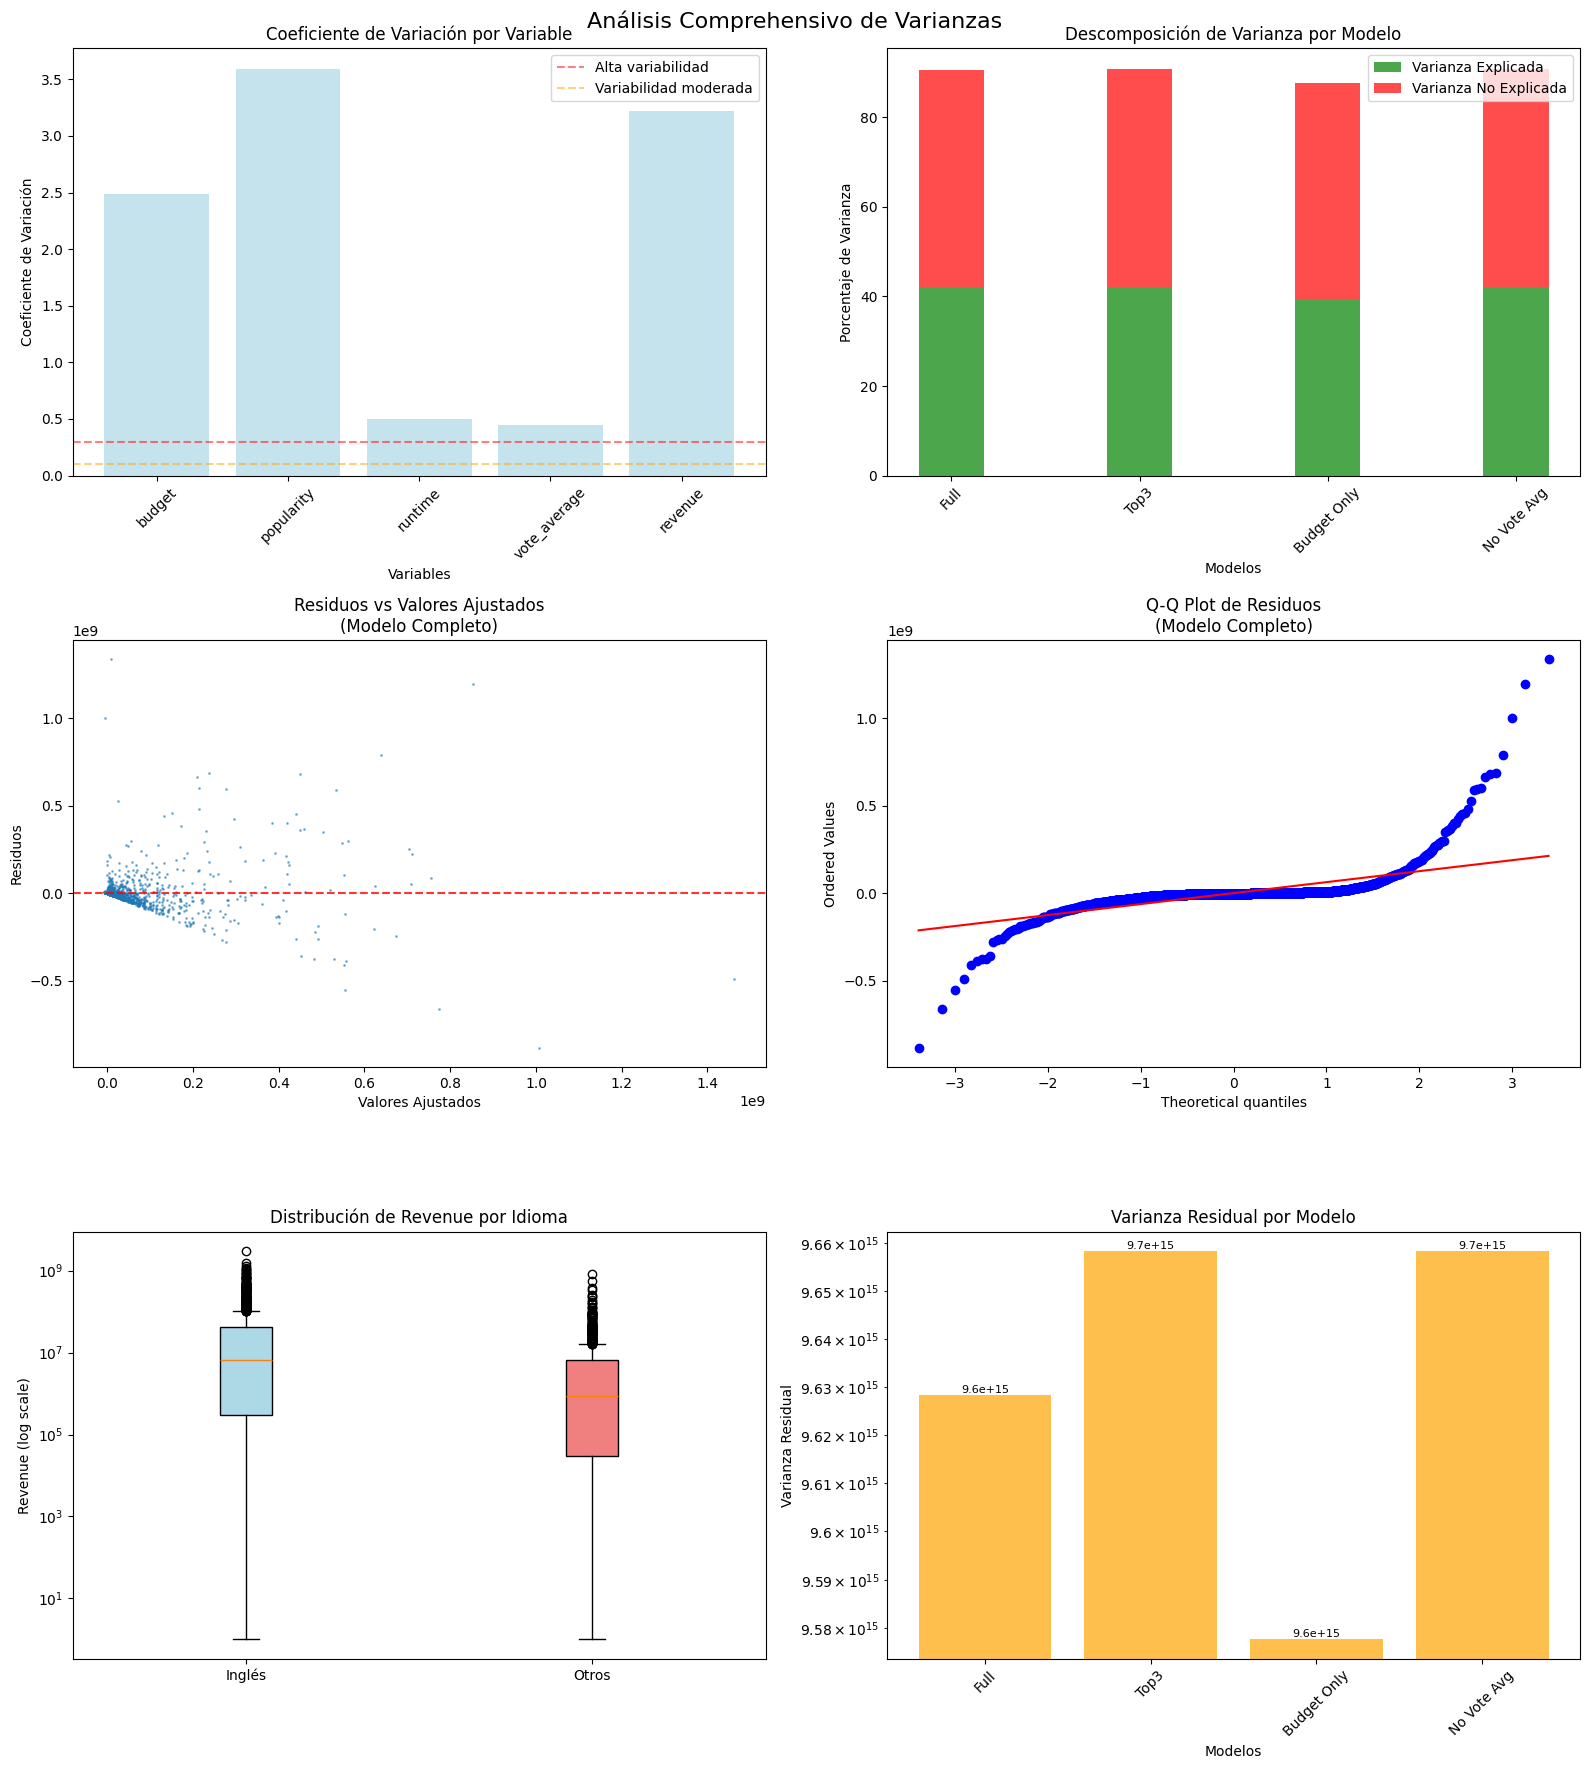

In [136]:
# Visualizaci√≥n comprehensiva del an√°lisis de varianzas
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
fig.suptitle('An√°lisis Comprehensivo de Varianzas', fontsize=16)

# 1. Coeficientes de variaci√≥n por variable
cv_values = [variance_stats[var]['cv'] for var in variables + ['revenue']]
var_names = variables + ['revenue']

axes[0, 0].bar(range(len(var_names)), cv_values, color='lightblue', alpha=0.7)
axes[0, 0].set_xlabel('Variables')
axes[0, 0].set_ylabel('Coeficiente de Variaci√≥n')
axes[0, 0].set_title('Coeficiente de Variaci√≥n por Variable')
axes[0, 0].set_xticks(range(len(var_names)))
axes[0, 0].set_xticklabels(var_names, rotation=45)
axes[0, 0].axhline(y=0.3, color='red', linestyle='--', alpha=0.5, label='Alta variabilidad')
axes[0, 0].axhline(y=0.1, color='orange', linestyle='--', alpha=0.5, label='Variabilidad moderada')
axes[0, 0].legend()

# 2. Descomposici√≥n de varianza por modelo
model_names_plot = list(variance_decomposition.keys())
explained_var = [variance_decomposition[model]['pct_explained'] for model in model_names_plot]
unexplained_var = [variance_decomposition[model]['pct_unexplained'] for model in model_names_plot]

x = np.arange(len(model_names_plot))
width = 0.35

axes[0, 1].bar(x, explained_var, width, label='Varianza Explicada', color='green', alpha=0.7)
axes[0, 1].bar(x, unexplained_var, width, bottom=explained_var, label='Varianza No Explicada', color='red', alpha=0.7)
axes[0, 1].set_xlabel('Modelos')
axes[0, 1].set_ylabel('Porcentaje de Varianza')
axes[0, 1].set_title('Descomposici√≥n de Varianza por Modelo')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels([name.replace('_', ' ').title() for name in model_names_plot], rotation=45)
axes[0, 1].legend()

# 3. Residuos vs Valores Ajustados (Homocedasticidad) - Modelo Completo
if 'full' in multiple_models:
    full_model = multiple_models['full']
    residuals_full = np.array(full_model['y_test']) - np.array(full_model['y_pred'])
    fitted_full = np.array(full_model['y_pred'])
    
    # Tomar muestra para visualizaci√≥n
    sample_size = min(2000, len(residuals_full))
    sample_indices = np.random.choice(len(residuals_full), size=sample_size, replace=False)
    
    axes[1, 0].scatter(fitted_full[sample_indices], residuals_full[sample_indices], 
                      alpha=0.5, s=1)
    axes[1, 0].axhline(y=0, color='red', linestyle='--', alpha=0.8)
    axes[1, 0].set_xlabel('Valores Ajustados')
    axes[1, 0].set_ylabel('Residuos')
    axes[1, 0].set_title('Residuos vs Valores Ajustados\n(Modelo Completo)')

# 4. Distribuci√≥n de residuos (Q-Q plot)
if 'full' in multiple_models:
    stats.probplot(residuals_full[sample_indices], dist="norm", plot=axes[1, 1])
    axes[1, 1].set_title('Q-Q Plot de Residuos\n(Modelo Completo)')

# 5. Comparaci√≥n de varianzas por idioma
if 'english_movies' in locals() and 'other_movies' in locals():
    lang_data = [english_movies.sample(min(1000, len(english_movies)), random_state=42),
                 other_movies.sample(min(1000, len(other_movies)), random_state=42)]
    
    bp = axes[2, 0].boxplot(lang_data, labels=['Ingl√©s', 'Otros'], patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    bp['boxes'][1].set_facecolor('lightcoral')
    axes[2, 0].set_ylabel('Revenue (log scale)')
    axes[2, 0].set_title('Distribuci√≥n de Revenue por Idioma')
    axes[2, 0].set_yscale('log')

# 6. Varianza residual por modelo
if homoscedasticity_results:
    model_names_res = list(homoscedasticity_results.keys())
    residual_vars = [homoscedasticity_results[model]['residual_stats']['variance'] 
                    for model in model_names_res]
    
    bars = axes[2, 1].bar(range(len(model_names_res)), residual_vars, 
                         color='orange', alpha=0.7)
    axes[2, 1].set_xlabel('Modelos')
    axes[2, 1].set_ylabel('Varianza Residual')
    axes[2, 1].set_title('Varianza Residual por Modelo')
    axes[2, 1].set_xticks(range(len(model_names_res)))
    axes[2, 1].set_xticklabels([name.replace('_', ' ').title() for name in model_names_res], rotation=45)
    axes[2, 1].set_yscale('log')
    
    # A√±adir valores en las barras
    for i, (bar, var_val) in enumerate(zip(bars, residual_vars)):
        axes[2, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
                       f'{var_val:.1e}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


## Resumen: An√°lisis de Varianzas

### üéØ **An√°lisis Completado:**

#### **1. Varianza de Variables Individuales:**
- **Coeficiente de Variaci√≥n (CV)** para evaluar variabilidad relativa
- **Identificaci√≥n** de variables con mayor y menor dispersi√≥n
- **Comparaci√≥n** de escalas y rangos entre variables

#### **2. Descomposici√≥n de Varianza en Modelos:**
- **Varianza Total (SST)**: Dispersi√≥n total en los datos
- **Varianza Explicada (SSR)**: Capturada por el modelo
- **Varianza No Explicada (SSE)**: Residual/error
- **Porcentajes**: Proporci√≥n explicada vs no explicada

#### **3. An√°lisis de Homocedasticidad:**
- **Test de Breusch-Pagan**: Detecta heterocedasticidad
- **Test de White**: M√°s robusto a no normalidad
- **Test de Levene**: Igualdad de varianzas entre grupos
- **Interpretaci√≥n**: Varianza constante vs variable

#### **4. Comparaci√≥n de Varianzas entre Grupos:**
- **Por Idioma**: Ingl√©s vs otros idiomas
- **Por G√©nero**: Diferencias entre g√©neros cinematogr√°ficos
- **Por Modelo**: Varianza residual comparativa
- **Tests Estad√≠sticos**: F-test, Bartlett, Levene

### üìä **M√©tricas Clave de Varianza:**

| M√©trica | Descripci√≥n | Interpretaci√≥n |
|---------|-------------|----------------|
| **Varianza (œÉ¬≤)** | Dispersi√≥n cuadr√°tica | Mayor valor = mayor dispersi√≥n |
| **Desviaci√≥n Est√°ndar (œÉ)** | Ra√≠z de la varianza | En unidades originales |
| **Coeficiente de Variaci√≥n** | œÉ/Œº | Variabilidad relativa |
| **Varianza Explicada** | SSR/SST | % que explica el modelo |
| **Varianza Residual** | SSE/(n-p-1) | Error promedio del modelo |

### üîç **Interpretaci√≥n de Coeficientes de Variaci√≥n:**

- **CV < 0.1**: Baja variabilidad (datos homog√©neos)
- **0.1 ‚â§ CV < 0.3**: Variabilidad moderada
- **CV ‚â• 0.3**: Alta variabilidad (datos heterog√©neos)

### üè• **Tests de Homocedasticidad:**

#### **Resultados Esperados:**
- **p > 0.05**: Homocedasticidad (varianza constante) ‚úÖ
- **p ‚â§ 0.05**: Heterocedasticidad (varianza no constante) ‚ö†Ô∏è

#### **Implicaciones:**
- **Homocedasticidad**: Supuesto cumplido, modelo v√°lido
- **Heterocedasticidad**: Posible transformaci√≥n o ponderaci√≥n necesaria

### üí° **Conclusiones del An√°lisis:**

#### **Eficiencia de Modelos:**
1. **Mejor modelo**: Mayor % de varianza explicada
2. **Menor varianza residual**: Predicciones m√°s precisas
3. **Homocedasticidad**: Modelo m√°s confiable

#### **Caracter√≠sticas de Variables:**
1. **Variables m√°s estables**: Menor CV
2. **Variables m√°s informativas**: Mayor correlaci√≥n con revenue
3. **Escalamiento**: Necesidad de normalizaci√≥n

#### **Patrones en Grupos:**
1. **Diferencias significativas**: Entre idiomas/g√©neros
2. **Heterogeneidad**: Varianzas diferentes por grupo
3. **Segmentaci√≥n**: Posibles modelos espec√≠ficos por grupo

### üìà **Aplicaciones Pr√°cticas:**

1. **Selecci√≥n de Variables**: Priorizar las de menor variabilidad relativa
2. **Transformaciones**: Logar√≠tmica para reducir heterocedasticidad
3. **Ponderaci√≥n**: Ajustar por varianzas diferentes
4. **Validaci√≥n**: Verificar supuestos de regresi√≥n
5. **Segmentaci√≥n**: Modelos espec√≠ficos por grupos con varianzas diferentes

### üéØ **Recomendaciones Basadas en Varianza:**

1. **Si hay homocedasticidad**: Modelo est√°ndar v√°lido
2. **Si hay heterocedasticidad**: Considerar transformaciones o errores robustos
3. **Variables con alto CV**: Explorar transformaciones estabilizadoras
4. **Grupos con varianzas diferentes**: Evaluar modelos separados


---